In [1]:
# !jupyter nbconvert --to webpdf --allow-chromium-download C:/Users/c8461417/Masterarbeit.ipynb

# Bibliotheken

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import os
from datetime import datetime, timedelta, time

# <span style="color:orange"> 0 Eingabe</span>

<span style="color:orange">Aktualisierung des Pfades</span>

In [3]:
projekt_pfad = r'C:\Users\c8461417\Desktop\2024_02\00_neu\02_Skripte'

In [4]:
eingabe = 'Eingabe.xlsx'
pfad_eingabe = os.path.join(projekt_pfad, eingabe)

In [5]:
ordner = ['01_SOLL', '02_IST', '03_SOLLTE' ]

for ordner in ordner:
    path = os.path.join(projekt_pfad, ordner)
    try:
        os.makedirs(path)
        print(f"Folder '{path}' created successfully")
    except FileExistsError:
        print(f"Folder '{path}' already exists")
    except Exception as e:
         print(f"\033[91mAn error occurred while creating '{path}': {e}\033[0m")

Folder 'C:\Users\c8461417\Desktop\2024_02\00_neu\02_Skripte\01_SOLL' already exists
Folder 'C:\Users\c8461417\Desktop\2024_02\00_neu\02_Skripte\02_IST' already exists
Folder 'C:\Users\c8461417\Desktop\2024_02\00_neu\02_Skripte\03_SOLLTE' already exists


## Achse

Einlesen der Achsdaten aus der .csv-Datei
- <span style="color:orange"> dateipfad_achse mit gewünschtem Pfad ersetzen</span>
- <span style="color:orange"> Trennzeichen bei Bedarf ändern</span>

Bemerkung: Es ist darauf zu achten, dass die Stationierung der importieren Datei die Start- und Endpunkten der geplanten Hübe darstellen.

In [6]:
dateipfad_achse = r'C:\Users\c8461417\Desktop\2024_02\00_neu\07_Achse\West\Achspunkte_pf.csv'
achse_df = pd.read_csv(dateipfad_achse, sep=';')

## Tätigkeiten

<span style="color:orange">Aktualisierung des Pfades und Inhalte der .xlsx-Datei</span>

In [7]:
taetigkeiten_df = pd.read_excel(pfad_eingabe, sheet_name='Tätigkeiten')

taetigkeiten_df['Dauer'] = taetigkeiten_df['Dauer'].astype(str)
taetigkeiten_df['Dauer'] = pd.to_timedelta(taetigkeiten_df['Dauer'])

columns_to_keep = ['Tätigkeit', 'Dauer', 'Code', 'Intervall']
taetigkeiten_df = taetigkeiten_df[columns_to_keep]

<span style="color:orange">Definiton des Zeitbedarfs vor Vor- und Nachbereitung des Vortriebs</span>

In [8]:
dauer_vorVT = timedelta(minutes=3)
dauer_nachVT = timedelta(minutes=3)

## Geologische und geotechnische Kennwerte

<span style="color:orange">aktuelle geologische- und geotechnische Kennwerte für Projekt in .xlsx-Datei eingeben</span>

In [9]:
gparameter_df = pd.read_excel(pfad_eingabe, sheet_name='Gesteins- und Gebirgsparameter')

## Maschinentechnische und logistische Kennwerte

<span style="color:orange"> sämtliche Kennwerte sind in der .xlsx-Datei anzupassen</span>

In [10]:
tparameter_df = pd.read_excel(pfad_eingabe, sheet_name='maschinentech u. log. Kennwerte')

In [11]:
hublänge = tparameter_df.at[0, 'Wert'] # m
andruckkraft = tparameter_df.at[1, 'Wert']
schneidringdurchmesser = tparameter_df.at[2, 'Wert']
schneidspurabstand = tparameter_df.at[3, 'Wert']
bohrkopfdrehzahl = tparameter_df.at[4, 'Wert']
begrenzung_p = tparameter_df.at[5, 'Wert']
k5 = tparameter_df.at[6, 'Wert']
max_hübetag = tparameter_df.at[7, 'Wert']
max_hübetagBSP = tparameter_df.at[8, 'Wert']
startst_zug = tparameter_df.at[9, 'Wert']
startst_tbm = tparameter_df.at[10, 'Wert']
v_einfahrt = (tparameter_df.at[11, 'Wert']) *1000/(60*60) # m/s entspricht 15km/h
v_ausfahrt = (tparameter_df.at[12, 'Wert']) *1000/(60*60) # m/s entspricht 20 km/h

k4 = 432/schneidringdurchmesser

## Datum und Uhrzeit

<span style="color:orange"> sämtliche Informationen sind in der .xlsx-Datei anzupassen</span>

In [12]:
dtparameter_df = pd.read_excel(pfad_eingabe, sheet_name='Datum und Uhrzeit')

In [13]:
# Projektstart
startdatum = dtparameter_df.at[0, 'Wert'] # Vortrieb
startzeit = dtparameter_df.at[1, 'Wert'] # Vortrieb

# Wartung
wartungsbeginn = dtparameter_df.at[2, 'Wert']
wartungsende = dtparameter_df.at[3, 'Wert']

startdatetime_wartung = datetime.combine(startdatum, wartungsbeginn)
enddatetime_wartung = datetime.combine(startdatum, wartungsende)

dauer_wartung = enddatetime_wartung - startdatetime_wartung

# Zeit für Puffer
minuten_tag = dtparameter_df.at[4, 'Wert']
bspdauer = dtparameter_df.at[5, 'Wert']

## Arbeitsvorschau

<span style="color:orange"> Die Anzahl der betrachten Hübe muss definiert werden.</span>

In [14]:
hubnummer_soll = 2000
hubnummer_sollte = 2000

<span style="color:orange"> gewünschtes Datum und Dauer für SOLL Arbeitsvorschau</span>

In [15]:
start_bet_soll = datetime(2024, 2, 11, 0, 0, 0)
ende_bet_soll = start_bet_soll + pd.Timedelta(hours=8)

<span style="color:orange"> gewünschtes Datum für Import des ISTs </span>

In [16]:
datum_importIST = "20240211" # Name der aktuellen Datei einfügen 

<span style="color:orange"> gewünschtes Datum für dynamische Arbeitsvorschau (SOLLTE) </span>

In [17]:
start_bet_sollte = datetime(2024, 2, 28, 0, 0, 0)
ende_bet_sollte = start_bet_sollte + pd.Timedelta(hours=8)

<span style="color:orange"> gewünschtes Datum für dynamische Wochenvorschau (SOLLTE) </span>

In [18]:
start_bet_vor = start_bet_sollte + pd.Timedelta(days=1)
ende_bet_vor = start_bet_vor + pd.DateOffset(days=13)

# 1 Verarbeitung der Daten

Das Wiederholungsintervall wird in Abhängigkeit der Einheit ermittelt.

In [19]:
intervall_VT = taetigkeiten_df[taetigkeiten_df['Tätigkeit'] == 'Vortrieb']['Intervall'].values[0]
intervall_RB = taetigkeiten_df[taetigkeiten_df['Tätigkeit'] == 'Ringbau']['Intervall'].values[0]
intervall_puffer = taetigkeiten_df[taetigkeiten_df['Tätigkeit'] == 'Puffer']['Intervall'].values[0]

intervall_BSP = taetigkeiten_df[taetigkeiten_df['Tätigkeit'] == 'Bandspeicher']['Intervall'].values[0]
intervall_BSP = int(intervall_BSP / hublänge)

intervall_RS = taetigkeiten_df[taetigkeiten_df['Tätigkeit'] == 'Ringspaltverfüllung']['Intervall'].values[0]
intervall_BKI = taetigkeiten_df[taetigkeiten_df['Tätigkeit'] == 'Bohrkopfinspektion']['Intervall'].values[0]
intervall_LH = taetigkeiten_df[taetigkeiten_df['Tätigkeit'] == 'Lutte hängen']['Intervall'].values[0]

intervall_GB = taetigkeiten_df[taetigkeiten_df['Tätigkeit'] == 'Gleisbau']['Intervall'].values[0]
intervall_GB = int(intervall_GB / hublänge)

intervall_SW = taetigkeiten_df[taetigkeiten_df['Tätigkeit'] == 'Schleppweiche']['Intervall'].values[0]
intervall_SW = int(intervall_SW / hublänge)

intervall_HV = taetigkeiten_df[taetigkeiten_df['Tätigkeit'] == 'HV-Kabel']['Intervall'].values[0] # meters
intervall_HV = int(intervall_HV / hublänge)

intervall_LK = taetigkeiten_df[taetigkeiten_df['Tätigkeit'] == 'Luttenkassettentausch']['Intervall'].values[0]
intervall_LK = int(intervall_LK / hublänge)

intervall_SF = taetigkeiten_df[taetigkeiten_df['Tätigkeit'] == 'Sohlfertigteil']['Intervall'].values[0]
intervall_STB = taetigkeiten_df[taetigkeiten_df['Tätigkeit'] == 'Streckenband']['Intervall'].values[0]

Erstellen der Hubliste

In [20]:
hubliste_df = achse_df.copy()

# Entfernen nicht benötigter Spalten
columns_to_drop = ['Rechtswert', 'Hochwert', 'Höhe']
hubliste_df.drop(columns=columns_to_drop, inplace=True) 

# Spalte Hubnummer
hubliste_df['Hubnummer'] = range(1, len(hubliste_df) + 1)

# Neuanordnung der Spalten
neue_reihenfolge = ['Hubnummer', 'Stationierung']
hubliste_df = hubliste_df[neue_reihenfolge]

Berechnung der Penetration + Zeitbedarf

In [21]:
penetration_df = gparameter_df.copy()

# Korrekturfaktor k1
def calculate_k1(row):
    if pd.isnull(row['Wf']):
        return 1
    else:
        return np.power(row['Wf'] / row['UCS'], -0.56) * 0.475

penetration_df['k1'] = penetration_df.apply(calculate_k1, axis=1)

# Korrekturfaktor k2
def calculate_trennflächenorientierung(row):
    return abs(np.degrees(np.arcsin(np.sin(row['Fallwinkel'] * (np.pi / 180)) * 
                                    np.sin((row['Vortriebsrichtung'] -
                                            row['Streichwinkel']) * (np.pi / 180)))))
penetration_df['Trennflächenorientierung'] = penetration_df.apply(calculate_trennflächenorientierung, axis=1)

def calculate_k2(row):
    if row['mittl_Trennflächenab'] > 50:
        if row['Trennflächenorientierung'] <= 15:
            return 1
        elif row['Trennflächenorientierung'] <= 45:
            return 1
        elif row['Trennflächenorientierung'] <= 75:
            return 1
        else:
            return 1
    elif row['mittl_Trennflächenab'] > 10:
        if row['Trennflächenorientierung'] <= 15:
            return 1.2
        elif row['Trennflächenorientierung'] <= 45:
            return 1.3
        elif row['Trennflächenorientierung'] <= 75:
            return 1.6
        else:
            return 1.3
    elif row['mittl_Trennflächenab'] > 5:
        if row['Trennflächenorientierung'] <= 15:
            return 1.4
        elif row['Trennflächenorientierung'] <= 45:
            return 1.8
        elif row['Trennflächenorientierung'] <= 75:
            return 2.3
        else:
            return 1.6
    else:
        if row['Trennflächenorientierung'] <= 15:
            return 1.7
        elif row['Trennflächenorientierung'] <= 45:
            return 2.3
        elif row['Trennflächenorientierung'] <= 75:
            return 3
        else:
            return 2

penetration_df['k2'] = penetration_df.apply(calculate_k2, axis=1)

# Korrekturfaktor k3
penetration_df['k3'] = 1

# Penetration nach Gehring
def calculate_penetration(row):
    penetration = (4 * andruckkraft)/row['UCS'] * row['k1'] * row['k2'] * row['k3'] * k4 * k5
    return min(penetration, begrenzung_p)
penetration_df['Penetration'] = penetration_df.apply(calculate_penetration, axis=1)

# Zeitbedarf
def calculate_zeitbedarf(row):
    return (1000*hublänge/(row['Penetration']*bohrkopfdrehzahl))
penetration_df['Zeitbedarf'] = penetration_df.apply(calculate_zeitbedarf, axis=1)

penetration_df['Zeitbedarf'] = pd.to_timedelta(penetration_df['Zeitbedarf'], unit = 'm')

# Entfernen nicht benötigter Spalten 
columns_to_drop = [ 'Anteil', 'Strukturgeol_Homogenb', 'UCS', 'Streichwinkel', 'Fallwinkel', 'Vortriebsrichtung', 
                   'mittl_Trennflächenab', 'Wf']
penetration_df.drop(columns=columns_to_drop, inplace=True) # 'Geotech_Homogenb', 'Gebirgsart',

# Runden des Zeitbedarfs auf Sekunden
penetration_df['Zeitbedarf'] = penetration_df['Zeitbedarf'].dt.round('s')

Berechnung des Puffer

In [22]:
# regulärer Tag
minuten_möglVTRB15 = timedelta(minutes=minuten_tag) - dauer_wartung
minuten_1VTRB15 = minuten_möglVTRB15 / max_hübetag

# BSP Tag
minuten_möglVTRB9 = timedelta(minutes=minuten_tag) - dauer_wartung - timedelta(minutes=bspdauer)
minuten_1VTRB9 = minuten_möglVTRB9 / max_hübetagBSP

# 2 SOLL Arbeitsvorschau

## Tätigkeitszuweisung

In [23]:
# Neuer DataFrame
taetigkeitenzuweisungSOLL_df = hubliste_df.copy()

#Filter
taetigkeitenzuweisungSOLL_df = taetigkeitenzuweisungSOLL_df.iloc[0:hubnummer_soll]

# Spalten erstellen
verschiedene_tätigkeiten = taetigkeiten_df['Tätigkeit'].unique()

for tätigkeit in verschiedene_tätigkeiten:
    taetigkeitenzuweisungSOLL_df[tätigkeit] = 0
    
# Spalten entfernen
columns_to_drop = ['Wartung', 'Ortsbrustaufnahme Kamera', 'Ortsbrustaufnahme Geologe']
taetigkeitenzuweisungSOLL_df = taetigkeitenzuweisungSOLL_df.drop(columns_to_drop, axis=1)

# Spalten befüllen
taetigkeitenzuweisungSOLL_df.loc[taetigkeitenzuweisungSOLL_df['Hubnummer'] % intervall_VT == 0, 'Vortrieb'] = 1
taetigkeitenzuweisungSOLL_df.loc[taetigkeitenzuweisungSOLL_df['Hubnummer'] % intervall_RB == 0, 'Ringbau'] = 1
taetigkeitenzuweisungSOLL_df.loc[taetigkeitenzuweisungSOLL_df['Hubnummer'] % intervall_puffer == 0, 'Puffer'] = 1
taetigkeitenzuweisungSOLL_df.loc[taetigkeitenzuweisungSOLL_df['Hubnummer'] % intervall_BSP == 0, 'Bandspeicher'] = 1
taetigkeitenzuweisungSOLL_df.loc[taetigkeitenzuweisungSOLL_df['Hubnummer'] % intervall_RS == 0, 'Ringspaltverfüllung'] = 1
taetigkeitenzuweisungSOLL_df.loc[taetigkeitenzuweisungSOLL_df['Hubnummer'] % intervall_BKI == 0, 'Bohrkopfinspektion'] = 1
taetigkeitenzuweisungSOLL_df.loc[taetigkeitenzuweisungSOLL_df['Hubnummer'] % intervall_GB == 0, 'Gleisbau'] = 1
taetigkeitenzuweisungSOLL_df.loc[taetigkeitenzuweisungSOLL_df['Hubnummer'] % intervall_SW == 0, 'Schleppweiche'] = 1
taetigkeitenzuweisungSOLL_df.loc[taetigkeitenzuweisungSOLL_df['Hubnummer'] % intervall_SF == 0, 'Sohlfertigteil'] = 1
taetigkeitenzuweisungSOLL_df.loc[taetigkeitenzuweisungSOLL_df['Hubnummer'] % intervall_LH == 0, 'Lutte hängen'] = 1
taetigkeitenzuweisungSOLL_df.loc[taetigkeitenzuweisungSOLL_df['Hubnummer'] % intervall_STB == 0, 'Streckenband'] = 1
taetigkeitenzuweisungSOLL_df.loc[taetigkeitenzuweisungSOLL_df['Hubnummer'] % intervall_LK == 0, 'Luttenkassettentausch'] = 1
taetigkeitenzuweisungSOLL_df.loc[taetigkeitenzuweisungSOLL_df['Hubnummer'] % intervall_HV == 0, 'HV-Kabel'] = 1



taetigkeitenzuweisungSOLL_df.loc[taetigkeitenzuweisungSOLL_df['Hubnummer'] % 2 == 0, 'Zugeinfahrt'] = 1
taetigkeitenzuweisungSOLL_df.loc[taetigkeitenzuweisungSOLL_df['Hubnummer'] % 2 != 0, 'Zugeinfahrt'] = 2

taetigkeitenzuweisungSOLL_df.loc[taetigkeitenzuweisungSOLL_df['Hubnummer'] % 2 == 0, 'Zug entladen'] = 1
taetigkeitenzuweisungSOLL_df.loc[taetigkeitenzuweisungSOLL_df['Hubnummer'] % 2 != 0, 'Zug entladen'] = 2

taetigkeitenzuweisungSOLL_df.loc[taetigkeitenzuweisungSOLL_df['Hubnummer'] % 2 == 0, 'Zug Tübbinge auf Feeder'] = 1
taetigkeitenzuweisungSOLL_df.loc[taetigkeitenzuweisungSOLL_df['Hubnummer'] % 2 != 0, 'Zug Tübbinge auf Feeder'] = 2

taetigkeitenzuweisungSOLL_df.loc[taetigkeitenzuweisungSOLL_df['Hubnummer'] % 2 == 0, 'Zugausfahrt'] = 1
taetigkeitenzuweisungSOLL_df.loc[taetigkeitenzuweisungSOLL_df['Hubnummer'] % 2 != 0, 'Zugausfahrt'] = 2

taetigkeitenzuweisungSOLL_df.loc[taetigkeitenzuweisungSOLL_df['Hubnummer'] % 2 == 0, 'Zug beladen'] = 1
taetigkeitenzuweisungSOLL_df.loc[taetigkeitenzuweisungSOLL_df['Hubnummer'] % 2 != 0, 'Zug beladen'] = 2


def BSP_maßgebend(row):
    if row['Ringbau'] == 1 and row['Bandspeicher'] == 1:
        return 1
    else:
        return 0

taetigkeitenzuweisungSOLL_df['BSP_maßgebend'] = taetigkeitenzuweisungSOLL_df.apply(BSP_maßgebend, axis=1)

## Zeitplan

### kritischer Weg

entpivotieren und zuordnen der Dauern

In [24]:
# neuer DataFrame
zeitplanSOLLk_df = pd.DataFrame()

# enpivotieren
zeitplanSOLLk_df = pd.melt(taetigkeitenzuweisungSOLL_df, id_vars=['Hubnummer'], 
                value_vars=['Vortrieb', 'Ringbau', 'Puffer', 'Bandspeicher'], var_name='Tätigkeit')

# filtern nach vorkommenden Tätigkeiten und neue Indizes
zeitplanSOLLk_df = zeitplanSOLLk_df[zeitplanSOLLk_df['value'] == 1]
zeitplanSOLLk_df.reset_index(drop=True, inplace=True)

# Stationierung abrufen
zeitplanSOLLk_df = pd.merge(zeitplanSOLLk_df, hubliste_df [['Hubnummer', 'Stationierung']], on='Hubnummer', how='inner')

# Codes für Reihenfolge
zeitplanSOLLk_df = pd.merge(zeitplanSOLLk_df, taetigkeiten_df, left_on='Tätigkeit', right_on='Tätigkeit')
zeitplanSOLLk_df['Codes'] = zeitplanSOLLk_df['Hubnummer'].astype(str) + zeitplanSOLLk_df['Code'].astype(str)
zeitplanSOLLk_df['Codes'] = zeitplanSOLLk_df['Codes'].astype(int)
zeitplanSOLLk_df = zeitplanSOLLk_df.sort_values(by='Codes')
zeitplanSOLLk_df.reset_index(drop=True, inplace=True)

Dauer Vortrieb in Anhängigkeit von Geologie und Geotechnik

In [25]:
def zeitbedarf_vt(row):
    if row['Tätigkeit'] == 'Vortrieb':
        vt_rows = penetration_df[(row['Stationierung'] >= penetration_df['Station_von']) & 
                                 (row['Stationierung'] <= penetration_df['Station_bis'])]
        if not vt_rows.empty:
            return vt_rows.iloc[0]['Zeitbedarf'] + dauer_vorVT + dauer_nachVT
    return row['Dauer']

zeitplanSOLLk_df['Dauer'] = zeitplanSOLLk_df.apply(zeitbedarf_vt, axis=1)
zeitplanSOLLk_df['Dauer'] = pd.to_timedelta(zeitplanSOLLk_df['Dauer'])

Tage Hubnummern zuordnen
- neue Spalte um die Punkte zuzuordnen
- Erzeugung einer Spalte mit den kumulierten Pkt, die bei max_hübetag auf 0 springt
- neue Spalte mit Datum, welches immer um 1 erhöht wird wenn die Spalte Tag auf 0 geht

In [26]:
def berechne_punkte(tätigkeit):
    if tätigkeit == 'Vortrieb' or tätigkeit == 'Ringbau':
        return 0.25
    elif tätigkeit == 'Puffer':
        return 0.5
    elif tätigkeit == 'Bandspeicher':
        return 5.5
    else:
        return 0

zeitplanSOLLk_df['Punkte'] = zeitplanSOLLk_df['Tätigkeit'].apply(berechne_punkte)

In [27]:
neuer_tag = 0 # Startwert für Subtraktion
tage_werte = [] # Array zum Speichern 

for index, row in zeitplanSOLLk_df.iterrows():
    nt = zeitplanSOLLk_df.loc[:index, 'Punkte'].sum() - neuer_tag
    
    if nt >= max_hübetag:
        neuer_tag = row['Hubnummer']
    
    tage_werte.append(nt)

# Liste wird DataFrame angehängt
zeitplanSOLLk_df['Tag'] = tage_werte

In [28]:
zeitplanSOLLk_df['Datum'] = startdatum.date()

current_date = startdatum
for i in range(1, len(zeitplanSOLLk_df)):
    if zeitplanSOLLk_df.loc[i, 'Tag'] < zeitplanSOLLk_df.loc[i - 1, 'Tag']:
        current_date += timedelta(days=1)
    zeitplanSOLLk_df.loc[i, 'Datum'] = current_date.date()
    
zeitplanSOLLk_df['Datum'] = pd.to_datetime(zeitplanSOLLk_df['Datum'])

Dauer Puffer 

In [29]:
bandspeicher_dates = zeitplanSOLLk_df[zeitplanSOLLk_df['Tätigkeit'] == 'Bandspeicher']['Datum'].unique()
zeitplanSOLLk_df['tag_bsp'] = np.where(zeitplanSOLLk_df['Datum'].isin(bandspeicher_dates), 1, 0)

In [30]:
def dauer_puffer(row):
    if row['Tätigkeit'] == 'Puffer':
        if row['tag_bsp'] == 0:
            return (minuten_1VTRB15 - zeitplanSOLLk_df.at[row.name - 1, 'Dauer'] 
                    - zeitplanSOLLk_df.at[row.name - 2, 'Dauer'])
        elif row['tag_bsp'] == 1:
            return (minuten_1VTRB9 - zeitplanSOLLk_df.at[row.name - 1, 'Dauer'] 
                    - zeitplanSOLLk_df.at[row.name - 2, 'Dauer'])
    else:
        return row['Dauer']

zeitplanSOLLk_df['Dauer'] = zeitplanSOLLk_df['Dauer'].astype(str)
zeitplanSOLLk_df['Dauer'] = pd.to_timedelta(zeitplanSOLLk_df['Dauer'])

zeitplanSOLLk_df['Dauer'] = zeitplanSOLLk_df.apply(dauer_puffer, axis=1)

In [31]:
columns_to_drop = ['value', 'Code', 'Punkte', 'Tag', 'Intervall', 'tag_bsp', 'Datum']
zeitplanSOLLk_df.drop(columns=columns_to_drop, inplace=True)

Start- und Endzeitpunkte

In [32]:
#  Neue Spalte Hilfsdauer
zeitplanSOLLk_df = pd.merge(zeitplanSOLLk_df, taetigkeitenzuweisungSOLL_df [['Hubnummer', 'BSP_maßgebend']],
                            on='Hubnummer', how='inner')

def hilfsdauer(row):
    if row['Tätigkeit'] == 'Vortrieb':
        return row['Dauer']
    elif row['Tätigkeit'] == 'Bandspeicher':
        return row['Dauer']
    elif row['BSP_maßgebend'] == 1 and row['Tätigkeit'] == 'Ringbau':
        return 0
    elif row['Tätigkeit'] == 'Ringbau':
        return row['Dauer']
    elif row['Tätigkeit'] == 'Puffer':
        return row['Dauer']
    else:
        return 0

zeitplanSOLLk_df['Hilfsdauer'] = zeitplanSOLLk_df.apply(hilfsdauer, axis=1)
zeitplanSOLLk_df['Hilfsdauer'] = pd.to_timedelta(zeitplanSOLLk_df['Hilfsdauer'])

zeitplanSOLLk_df.drop(columns=['BSP_maßgebend'], inplace=True)

# Neue Spalte für Wartung
zeitplanSOLLk_df['Hilfsdauer_Wartung'] = pd.to_timedelta(np.zeros(len(zeitplanSOLLk_df)), unit='s')

# Berechnen der kumulierten Summen
zeitplanSOLLk_df['Kumulierte_Summe'] = zeitplanSOLLk_df['Hilfsdauer'].cumsum() - zeitplanSOLLk_df['Hilfsdauer']

# Startzeitpunkt
zeitplanSOLLk_df['Startzeitpunkt'] = pd.to_datetime(startdatum + zeitplanSOLLk_df['Kumulierte_Summe'])

# Endzeitpunkt
zeitplanSOLLk_df['Endzeitpunkt'] = pd.to_datetime(zeitplanSOLLk_df['Startzeitpunkt'] + zeitplanSOLLk_df['Dauer'])

# Neue Spalte mit Datum des Endzeitpunktes hinzufügen
zeitplanSOLLk_df['Endzeitpunkt_Datum'] = zeitplanSOLLk_df['Endzeitpunkt'].dt.date

anzahl_tage = zeitplanSOLLk_df['Endzeitpunkt_Datum'].nunique()
print("Anzahl der verschiedenen Werte in Endzeitpunkt_Datum:", anzahl_tage)

Anzahl der verschiedenen Werte in Endzeitpunkt_Datum: 123


#### Wartungszeilen einfügen

In [33]:
delta = np.full((anzahl_tage), pd.Timedelta('0 days 00:00:00'))

for x in range(anzahl_tage):
#     print(x)
    if len(zeitplanSOLLk_df[(zeitplanSOLLk_df['Startzeitpunkt'].dt.time < wartungsbeginn) & 
                            (zeitplanSOLLk_df['Endzeitpunkt'].dt.time >= wartungsbeginn)]) == 0 :
        break
    
    index_of_rows = zeitplanSOLLk_df[(zeitplanSOLLk_df['Startzeitpunkt'].dt.time < wartungsbeginn) & 
                                     (zeitplanSOLLk_df['Endzeitpunkt'].dt.time >= wartungsbeginn)].index[0]
#     print(index_of_rows)

    
    # Hubnummer und Stationierung abrufen
    hubnummer = zeitplanSOLLk_df.Hubnummer[index_of_rows]
    station = zeitplanSOLLk_df.Stationierung[index_of_rows]
    
    # Hilfsdauer der Wartung berechnen
    aktueller_tag = zeitplanSOLLk_df.Startzeitpunkt[index_of_rows].date() #ow = ohne wartung
    start_aktivität = zeitplanSOLLk_df.loc[index_of_rows , 'Startzeitpunkt']
    wartungsbeginn_aktuell = datetime.combine(aktueller_tag, wartungsbeginn)
    delta[x] = wartungsbeginn_aktuell - start_aktivität
    hilfsdauer_wartung = delta[x] + dauer_wartung
    
   

    # Zeile einfügen
    zeitplanSOLLk_df.loc[index_of_rows - 0.5] = [hubnummer, 'Wartung', station , dauer_wartung, None, 
                                                 hilfsdauer_wartung, delta[x], None, None, None, None]

    zeitplanSOLLk_df.loc[(zeitplanSOLLk_df['Tätigkeit'] == 'Puffer') & 
                         (zeitplanSOLLk_df['Hubnummer'] == hubnummer), 'Dauer'] -= delta[x]
    zeitplanSOLLk_df.loc[(zeitplanSOLLk_df['Tätigkeit'] == 'Puffer') & 
                         (zeitplanSOLLk_df['Hubnummer'] == hubnummer), 'Hilfsdauer'] -= delta[x]
        
    # Indizes aktualisieren und sortieren
    zeitplanSOLLk_df = zeitplanSOLLk_df.sort_index().reset_index(drop=True)
    

    # Berechnen der kumulierten Summen
    zeitplanSOLLk_df['Kumulierte_Summe'] = zeitplanSOLLk_df['Hilfsdauer'].cumsum() - zeitplanSOLLk_df['Hilfsdauer']
       
    # Endzeitpunkt
    zeitplanSOLLk_df['Startzeitpunkt'] = pd.to_datetime(startdatum + zeitplanSOLLk_df['Kumulierte_Summe']  + zeitplanSOLLk_df['Hilfsdauer_Wartung'])
    
    # Endzeitpunkt
    zeitplanSOLLk_df['Endzeitpunkt'] = pd.to_datetime(zeitplanSOLLk_df['Startzeitpunkt'] + zeitplanSOLLk_df['Dauer'])
    
    # Neue Spalte mit Datum des Endzeitpunktes hinzufügen
    zeitplanSOLLk_df['Endzeitpunkt_Datum'] = zeitplanSOLLk_df['Endzeitpunkt'].dt.date

anzahl_tage_ende = zeitplanSOLLk_df['Endzeitpunkt_Datum'].nunique()
# if anzahl_tage_ende > anzahl_tage:
#     print("Schleife muss neu justiert werden")

C:\Users\c8461417\AppData\Local\Temp\ipykernel_7256\2889567410.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  zeitplanSOLLk_df.loc[index_of_rows - 0.5] = [hubnummer, 'Wartung', station , dauer_wartung, None,
C:\Users\c8461417\AppData\Local\Temp\ipykernel_7256\2889567410.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  zeitplanSOLLk_df.loc[index_of_rows - 0.5] = [hubnummer, 'Wartung', station , dauer_wartung, None,
C:\Users\c8461417\AppData\Local\Temp\ipykernel_7256\2889567410.py:28: Fu

C:\Users\c8461417\AppData\Local\Temp\ipykernel_7256\2889567410.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  zeitplanSOLLk_df.loc[index_of_rows - 0.5] = [hubnummer, 'Wartung', station , dauer_wartung, None,
C:\Users\c8461417\AppData\Local\Temp\ipykernel_7256\2889567410.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  zeitplanSOLLk_df.loc[index_of_rows - 0.5] = [hubnummer, 'Wartung', station , dauer_wartung, None,
C:\Users\c8461417\AppData\Local\Temp\ipykernel_7256\2889567410.py:28: Fu

C:\Users\c8461417\AppData\Local\Temp\ipykernel_7256\2889567410.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  zeitplanSOLLk_df.loc[index_of_rows - 0.5] = [hubnummer, 'Wartung', station , dauer_wartung, None,
C:\Users\c8461417\AppData\Local\Temp\ipykernel_7256\2889567410.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  zeitplanSOLLk_df.loc[index_of_rows - 0.5] = [hubnummer, 'Wartung', station , dauer_wartung, None,
C:\Users\c8461417\AppData\Local\Temp\ipykernel_7256\2889567410.py:28: Fu

C:\Users\c8461417\AppData\Local\Temp\ipykernel_7256\2889567410.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  zeitplanSOLLk_df.loc[index_of_rows - 0.5] = [hubnummer, 'Wartung', station , dauer_wartung, None,
C:\Users\c8461417\AppData\Local\Temp\ipykernel_7256\2889567410.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  zeitplanSOLLk_df.loc[index_of_rows - 0.5] = [hubnummer, 'Wartung', station , dauer_wartung, None,
C:\Users\c8461417\AppData\Local\Temp\ipykernel_7256\2889567410.py:28: Fu

C:\Users\c8461417\AppData\Local\Temp\ipykernel_7256\2889567410.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  zeitplanSOLLk_df.loc[index_of_rows - 0.5] = [hubnummer, 'Wartung', station , dauer_wartung, None,
C:\Users\c8461417\AppData\Local\Temp\ipykernel_7256\2889567410.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  zeitplanSOLLk_df.loc[index_of_rows - 0.5] = [hubnummer, 'Wartung', station , dauer_wartung, None,
C:\Users\c8461417\AppData\Local\Temp\ipykernel_7256\2889567410.py:28: Fu

C:\Users\c8461417\AppData\Local\Temp\ipykernel_7256\2889567410.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  zeitplanSOLLk_df.loc[index_of_rows - 0.5] = [hubnummer, 'Wartung', station , dauer_wartung, None,
C:\Users\c8461417\AppData\Local\Temp\ipykernel_7256\2889567410.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  zeitplanSOLLk_df.loc[index_of_rows - 0.5] = [hubnummer, 'Wartung', station , dauer_wartung, None,
C:\Users\c8461417\AppData\Local\Temp\ipykernel_7256\2889567410.py:28: Fu

erneuter Durchlauf der Schleife

In [34]:
delta = np.full((anzahl_tage), pd.Timedelta('0 days 00:00:00'))
differenz = anzahl_tage_ende - anzahl_tage

if anzahl_tage_ende > anzahl_tage:
    print("Schleife muss neu justiert werden")

    for x in range(differenz+100):

        if len(zeitplanSOLLk_df[(zeitplanSOLLk_df['Startzeitpunkt'].dt.time < wartungsbeginn) & 
                                (zeitplanSOLLk_df['Endzeitpunkt'].dt.time >= wartungsbeginn)]) == 0 :
            break
        
        index_of_rows = zeitplanSOLLk_df[(zeitplanSOLLk_df['Startzeitpunkt'].dt.time < wartungsbeginn) & 
                                         (zeitplanSOLLk_df['Endzeitpunkt'].dt.time >= wartungsbeginn)].index[0]

    
        # Hubnummer und Stationierung abrufen
        hubnummer = zeitplanSOLLk_df.Hubnummer[index_of_rows]
        station = zeitplanSOLLk_df.Stationierung[index_of_rows]
    
        # Hilfsdauer der Wartung berechnen
        aktueller_tag = zeitplanSOLLk_df.Startzeitpunkt[index_of_rows].date() #ow = ohne wartung
        start_aktivität = zeitplanSOLLk_df.loc[index_of_rows , 'Startzeitpunkt']
        wartungsbeginn_aktuell = datetime.combine(aktueller_tag, wartungsbeginn)
        delta[x] = wartungsbeginn_aktuell - start_aktivität
        hilfsdauer_wartung = delta[x] + dauer_wartung

        # Zeile einfügen
        zeitplanSOLLk_df.loc[index_of_rows - 0.5] = [hubnummer, 'Wartung', station , dauer_wartung, None,
                                                     hilfsdauer_wartung, delta[x], None, None, None, None]

        zeitplanSOLLk_df.loc[(zeitplanSOLLk_df['Tätigkeit'] == 'Puffer') & 
                             (zeitplanSOLLk_df['Hubnummer'] == hubnummer), 'Dauer'] -= delta[x]
        zeitplanSOLLk_df.loc[(zeitplanSOLLk_df['Tätigkeit'] == 'Puffer') & 
                             (zeitplanSOLLk_df['Hubnummer'] == hubnummer), 'Hilfsdauer'] -= delta[x]
        
    
        # Indizes aktualisieren und sortieren
        zeitplanSOLLk_df = zeitplanSOLLk_df.sort_index().reset_index(drop=True)
    

        # Berechnen der kumulierten Summen
        zeitplanSOLLk_df['Kumulierte_Summe'] = zeitplanSOLLk_df['Hilfsdauer'].cumsum() - zeitplanSOLLk_df['Hilfsdauer']
       
        # Endzeitpunkt
        zeitplanSOLLk_df['Startzeitpunkt'] = pd.to_datetime(startdatum + zeitplanSOLLk_df['Kumulierte_Summe'] + 
                                                            zeitplanSOLLk_df['Hilfsdauer_Wartung'])
    
        # Endzeitpunkt
        zeitplanSOLLk_df['Endzeitpunkt'] = pd.to_datetime(zeitplanSOLLk_df['Startzeitpunkt'] + zeitplanSOLLk_df['Dauer'])
    
        # Neue Spalte mit Datum des Endzeitpunktes hinzufügen
        zeitplanSOLLk_df['Endzeitpunkt_Datum'] = zeitplanSOLLk_df['Endzeitpunkt'].dt.date

anzahl_tage_akt = zeitplanSOLLk_df['Endzeitpunkt_Datum'].nunique()
# if anzahl_tage_ende > anzahl_tage_akt:
#     print("Schleife muss neu justiert werden")

Schleife muss neu justiert werden


C:\Users\c8461417\AppData\Local\Temp\ipykernel_7256\2391902679.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  zeitplanSOLLk_df.loc[index_of_rows - 0.5] = [hubnummer, 'Wartung', station , dauer_wartung, None,
C:\Users\c8461417\AppData\Local\Temp\ipykernel_7256\2391902679.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  zeitplanSOLLk_df.loc[index_of_rows - 0.5] = [hubnummer, 'Wartung', station , dauer_wartung, None,
C:\Users\c8461417\AppData\Local\Temp\ipykernel_7256\2391902679.py:29: Fu

In [35]:
# Überflüssige Spalten entfernen
columns_to_drop = ['Hilfsdauer', 'Hilfsdauer_Wartung', 'Kumulierte_Summe', 'Endzeitpunkt_Datum']
zeitplanSOLLk_df.drop(columns=columns_to_drop, inplace=True)

### Sekundärtätigkeit

In [36]:
# neuer DataFrame
zeitplanSOLLs_df = pd.DataFrame()

# enpivotieren
zeitplanSOLLs_df = pd.melt(taetigkeitenzuweisungSOLL_df, id_vars=['Hubnummer'], 
                           value_vars=['Ringspaltverfüllung', 'Bohrkopfinspektion', 'Gleisbau',
                                       'Schleppweiche', 'Sohlfertigteil', 'Streckenband', 'Lutte hängen',
                                       'HV-Kabel', 'Luttenkassettentausch'], var_name='Tätigkeit')

# filtern nach vorkommenden Tätigkeiten und neue Indizes
zeitplanSOLLs_df = zeitplanSOLLs_df[zeitplanSOLLs_df['value'] == 1]
zeitplanSOLLs_df.reset_index(drop=True, inplace=True)

# Stationierung abrufen
zeitplanSOLLs_df = pd.merge(zeitplanSOLLs_df, hubliste_df [['Hubnummer', 'Stationierung']], on='Hubnummer', how='inner')

# Codes für Reihenfolge
zeitplanSOLLs_df = pd.merge(zeitplanSOLLs_df, taetigkeiten_df, left_on='Tätigkeit', right_on='Tätigkeit')
zeitplanSOLLs_df['Codes'] = zeitplanSOLLs_df['Hubnummer'].astype(str) + zeitplanSOLLs_df['Code'].astype(str)
zeitplanSOLLs_df['Codes'] = zeitplanSOLLs_df['Codes'].astype(int)
zeitplanSOLLs_df = zeitplanSOLLs_df.sort_values(by='Codes')
zeitplanSOLLs_df.reset_index(drop=True, inplace=True)

# Überflüssige Spalten entfernen
columns_to_drop = ['value', 'Code']
zeitplanSOLLs_df.drop(columns=columns_to_drop, inplace=True)

# Neuanordnung der Spalten
neue_reihenfolge = ['Hubnummer', 'Stationierung', 'Codes', 'Tätigkeit', 'Dauer']
zeitplanSOLLs_df = zeitplanSOLLs_df[neue_reihenfolge]

Zeilen für zeitabhängige Sekundärtätigkeiten während Wartung (überprüft ob die Hubnummer > als die der Zeile darüber ist und ob für dieses Hubnummer in zeitplanSOLLk_df eine Wartung ausgeführt wird, ist dies der Fall werden die drei Zeilen mit den Informationen der Tätigkeiten eingefügt und die Indexe angepasst)

In [37]:
index = 0
while index < len(zeitplanSOLLs_df):
    if index > 0:
        prev_row = zeitplanSOLLs_df.iloc[index - 1]
        row = zeitplanSOLLs_df.iloc[index]
              
        if row['Hubnummer'] > prev_row['Hubnummer'] and row['Hubnummer'] in zeitplanSOLLk_df.loc[
                zeitplanSOLLk_df['Tätigkeit'] == 'Wartung', 'Hubnummer'].values:
            new_rows = pd.DataFrame({
                'Hubnummer': [row['Hubnummer']] * 3,
                'Tätigkeit': ['Ortsbrustaufnahme Kamera', 'Ortsbrustaufnahme Geologe', 'Rohrleitungsbau'],
                'Codes': [row['Codes'] + 0.25, row['Codes'] + 0.5, row['Codes'] + 0.75,],
                'Stationierung': [row['Stationierung']] * 3,
                'Dauer': ['00:15:00', '00:30:00', '00:30:00']
            }) 
            zeitplanSOLLs_df = pd.concat([zeitplanSOLLs_df.iloc[:index + 1], new_rows, 
                                          zeitplanSOLLs_df.iloc[index + 2:]]).reset_index(drop=True)
            zeitplanSOLLs_df = zeitplanSOLLs_df.reset_index(drop=True)
            index += 4  
            continue
    index += 1

Start- und Endzeitpunkte berechnen

In [38]:
# DataFrame für Startzeitpunkte des kritischen Weges erstellen
VT_SOLL_df = zeitplanSOLLk_df.loc[zeitplanSOLLk_df['Tätigkeit'] == 'Vortrieb'].copy()
VT_SOLL_df = VT_SOLL_df.reset_index(drop=True)

RB_SOLL_df = zeitplanSOLLk_df.loc[zeitplanSOLLk_df['Tätigkeit'] == 'Ringbau'].copy()
RB_SOLL_df = RB_SOLL_df.reset_index(drop=True)


BSP_SOLL_df = zeitplanSOLLk_df.loc[zeitplanSOLLk_df['Tätigkeit'] == 'Bandspeicher'].copy()
BSP_SOLL_df = BSP_SOLL_df.reset_index(drop=True)

WA_SOLL_df = zeitplanSOLLk_df.loc[zeitplanSOLLk_df['Tätigkeit'] == 'Wartung'].copy()
WA_SOLL_df = WA_SOLL_df.reset_index(drop=True)


#Startzeitpunkte kritischer Weg abrufen
zeitplanSOLLs_df = pd.merge(zeitplanSOLLs_df, VT_SOLL_df[['Hubnummer', 'Startzeitpunkt']], on='Hubnummer')
zeitplanSOLLs_df.rename(columns={'Startzeitpunkt': 'StartVT'}, inplace=True)

zeitplanSOLLs_df = pd.merge(zeitplanSOLLs_df, RB_SOLL_df[['Hubnummer', 'Startzeitpunkt']], on='Hubnummer')
zeitplanSOLLs_df.rename(columns={'Startzeitpunkt': 'StartRB'}, inplace=True)

zeitplanSOLLs_df = pd.merge(zeitplanSOLLs_df, RB_SOLL_df[['Hubnummer', 'Endzeitpunkt']], on='Hubnummer')
zeitplanSOLLs_df.rename(columns={'Endzeitpunkt': 'EndeRB'}, inplace=True)

zeitplanSOLLs_df = pd.merge(zeitplanSOLLs_df, BSP_SOLL_df[['Hubnummer', 'Startzeitpunkt']], on='Hubnummer', how='left')
zeitplanSOLLs_df.rename(columns={'Startzeitpunkt': 'StartBSP'}, inplace=True)

zeitplanSOLLs_df = pd.merge(zeitplanSOLLs_df, WA_SOLL_df[['Hubnummer', 'Startzeitpunkt']], on='Hubnummer', how='left')
zeitplanSOLLs_df.rename(columns={'Startzeitpunkt': 'StartWA'}, inplace=True)

# Startzeitpunkt über Bedingung definieren
def startzeitpunkt_s(row):
    if row['Tätigkeit'] == 'Ringspaltverfüllung':
        val = row['StartVT']
    elif row['Tätigkeit'] == 'Gleisbau':
        val = row['StartVT']
    elif row['Tätigkeit'] == 'Schleppweiche':
        val = row['StartVT']
    elif row['Tätigkeit'] == 'Streckenband':
        val = row['StartVT']    
    elif row['Tätigkeit'] == 'Bohrkopfinspektion':
        val = row['StartRB']
    elif row['Tätigkeit'] == 'Sohlfertigteil':
        val = row['EndeRB']
    elif row['Tätigkeit'] == 'Lutte hängen':
        val = row['StartRB']
    elif row['Tätigkeit'] == 'Ortsbrustaufnahme Kamera':
        val = row['StartWA']
    elif row['Tätigkeit'] == 'Luttenkassettentausch':
        val = row['StartBSP']
    elif row['Tätigkeit'] == 'Rohrleitungsbau':
        val = row['StartWA']
    elif row['Tätigkeit'] == 'HV-Kabel':
        val = row['StartBSP']
    else:
        val = 0
    return val

zeitplanSOLLs_df['Startzeitpunkt'] = zeitplanSOLLs_df.apply(startzeitpunkt_s, axis=1)

zeitplanSOLLs_df['Dauer'] = pd.to_timedelta(zeitplanSOLLs_df['Dauer'])

for index in zeitplanSOLLs_df.index:
    if zeitplanSOLLs_df.loc[index, 'Tätigkeit'] == 'Ortsbrustaufnahme Geologe':
        zeitplanSOLLs_df.loc[index, 'Startzeitpunkt'] = zeitplanSOLLs_df.loc[index, 'StartWA'] + zeitplanSOLLs_df.loc[index - 1, 'Dauer']

# Endzeitpunkt
zeitplanSOLLs_df['Endzeitpunkt'] = pd.to_datetime(pd.to_datetime(zeitplanSOLLs_df['Startzeitpunkt']) 
                                                  + zeitplanSOLLs_df['Dauer'])

# Löschen der Spalten
columns_to_drop = ['StartVT', 'StartRB', 'EndeRB', 'StartBSP', 'StartWA']
zeitplanSOLLs_df = zeitplanSOLLs_df.drop(columns_to_drop, axis=1)

### Versorgungszug

In [39]:
# neuer DataFrame
zeitplanSOLLz_df = pd.DataFrame()

# enpivotieren
zeitplanSOLLz_df = pd.melt(taetigkeitenzuweisungSOLL_df, id_vars=['Hubnummer'],
                           value_vars=['Zugeinfahrt', 'Zug Tübbinge auf Feeder', 'Zug entladen', 'Zugausfahrt', 'Zug beladen' ],
                           var_name='Tätigkeit')

# Stationierung abrufen
zeitplanSOLLz_df = pd.merge(zeitplanSOLLz_df, hubliste_df [['Hubnummer', 'Stationierung']], on='Hubnummer', how='inner')

# Codes für Reihenfolge
zeitplanSOLLz_df = pd.merge(zeitplanSOLLz_df, taetigkeiten_df, left_on='Tätigkeit', right_on='Tätigkeit')
zeitplanSOLLz_df['Codes'] = zeitplanSOLLz_df['Hubnummer'].astype(str) + zeitplanSOLLz_df['Code'].astype(str)
zeitplanSOLLz_df['Codes'] = zeitplanSOLLz_df['Codes'].astype(int)
zeitplanSOLLz_df = zeitplanSOLLz_df.sort_values(by='Codes')
zeitplanSOLLz_df.reset_index(drop=True, inplace=True)

# Startzeitpunkt RB abrufen
zeitplanSOLLz_df = pd.merge(zeitplanSOLLz_df, RB_SOLL_df[['Hubnummer', 'Startzeitpunkt']], on='Hubnummer')
zeitplanSOLLz_df.rename(columns={'Startzeitpunkt': 'StartRB'}, inplace=True)

# Teilung in DataFrame Zug 1 und Zug 2
zeitplanSOLLz1_df = zeitplanSOLLz_df[zeitplanSOLLz_df['value'] == 1]
zeitplanSOLLz1_df.reset_index(drop=True, inplace=True)

zeitplanSOLLz2_df = zeitplanSOLLz_df[zeitplanSOLLz_df['value'] == 2]
zeitplanSOLLz2_df.reset_index(drop=True, inplace=True)

# Dauer für Einfahrt bzw. Ausfahrt in Abhängigkeit der aktuellen Station berechnen
def dauer_zugeinfahrt(row):
    if row['Tätigkeit'] == 'Zugeinfahrt':
        seconds = (row['Stationierung'] - startst_zug) / v_einfahrt
        return timedelta(seconds=seconds)
    else:
        return row['Dauer']

zeitplanSOLLz1_df['Dauer'] = zeitplanSOLLz1_df.apply(dauer_zugeinfahrt, axis=1)
zeitplanSOLLz2_df['Dauer'] = zeitplanSOLLz2_df.apply(dauer_zugeinfahrt, axis=1)

def dauer_zugausfahrt(row):
    if row['Tätigkeit'] == 'Zugausfahrt':
        seconds = (row['Stationierung'] - startst_zug) / v_ausfahrt
        return timedelta(seconds=seconds)
    else:
        return row['Dauer']


zeitplanSOLLz1_df['Dauer'] = zeitplanSOLLz1_df.apply(dauer_zugausfahrt, axis=1)
zeitplanSOLLz2_df['Dauer'] = zeitplanSOLLz2_df.apply(dauer_zugausfahrt, axis=1)


# Startzeitpunkte
def zugstartzeitpunkt(row):
    if row['Tätigkeit'] == 'Zugeinfahrt':
        val = row['StartRB'] - row['Dauer']
    elif row['Tätigkeit'] == 'Zug entladen':
        val = row['StartRB']
    else:
        val = 0
    return val

zeitplanSOLLz1_df['Startzeitpunkt'] = zeitplanSOLLz1_df.apply(zugstartzeitpunkt, axis=1)
zeitplanSOLLz2_df['Startzeitpunkt'] = zeitplanSOLLz2_df.apply(zugstartzeitpunkt, axis=1)

for index in zeitplanSOLLz1_df.index:
    if zeitplanSOLLz1_df.loc[index, 'Tätigkeit'] == 'Zugausfahrt':
        zeitplanSOLLz1_df.loc[index, 'Startzeitpunkt'] = zeitplanSOLLz1_df.loc[index, 'StartRB'] + zeitplanSOLLz1_df.loc[
            index - 1, 'Dauer']

for index in zeitplanSOLLz1_df.index:
    if zeitplanSOLLz1_df.loc[index, 'Tätigkeit'] == 'Zug beladen':
        zeitplanSOLLz1_df.loc[index, 'Startzeitpunkt'] = zeitplanSOLLz1_df.loc[index, 'StartRB'] + zeitplanSOLLz1_df.loc[
            index - 2, 'Dauer'] + zeitplanSOLLz1_df.loc[index - 1, 'Dauer']        
        
for index in zeitplanSOLLz2_df.index:
    if zeitplanSOLLz2_df.loc[index, 'Tätigkeit'] == 'Zugausfahrt':
        zeitplanSOLLz2_df.loc[index, 'Startzeitpunkt'] = zeitplanSOLLz2_df.loc[index, 'StartRB'] + zeitplanSOLLz2_df.loc[
            index - 1, 'Dauer']

for index in zeitplanSOLLz2_df.index:
    if zeitplanSOLLz2_df.loc[index, 'Tätigkeit'] == 'Zug beladen':
        zeitplanSOLLz2_df.loc[index, 'Startzeitpunkt'] = zeitplanSOLLz2_df.loc[index, 'StartRB'] + zeitplanSOLLz2_df.loc[
            index - 2, 'Dauer'] + zeitplanSOLLz2_df.loc[index - 1, 'Dauer']

    
zeitplanSOLLz1_df['Startzeitpunkt'] = pd.to_datetime(zeitplanSOLLz1_df['Startzeitpunkt'])
zeitplanSOLLz1_df['Endzeitpunkt'] = pd.to_datetime(zeitplanSOLLz1_df['Startzeitpunkt'] + zeitplanSOLLz1_df['Dauer'])

zeitplanSOLLz2_df['Startzeitpunkt'] = pd.to_datetime(zeitplanSOLLz2_df['Startzeitpunkt'])
zeitplanSOLLz2_df['Endzeitpunkt'] = pd.to_datetime(zeitplanSOLLz2_df['Startzeitpunkt'] + zeitplanSOLLz2_df['Dauer'])

columns_to_drop = ['StartRB']
zeitplanSOLLz1_df.drop(columns=columns_to_drop, inplace=True)
zeitplanSOLLz2_df.drop(columns=columns_to_drop, inplace=True)

C:\Users\c8461417\AppData\Local\Temp\ipykernel_7256\1448333390.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zeitplanSOLLz1_df['Dauer'] = zeitplanSOLLz1_df.apply(dauer_zugeinfahrt, axis=1)
C:\Users\c8461417\AppData\Local\Temp\ipykernel_7256\1448333390.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zeitplanSOLLz2_df['Dauer'] = zeitplanSOLLz2_df.apply(dauer_zugeinfahrt, axis=1)
C:\Users\c8461417\AppData\Local\Temp\ipykernel_7256\1448333390.py:49: SettingWithCopyWarning: 
A value is trying to be s

## visualisierte Arbeitsvorschau

Betrachtungszeitraum

In [40]:
date_range = pd.date_range(start=start_bet_soll, end=ende_bet_soll , freq='min')

In [41]:
betrachtungs_df = pd.DataFrame(columns=['Zeitpunkt'])
betrachtungs_df['Zeitpunkt'] = date_range

DataFrame auf ausgeweiteten Betrachtungszeitraum verkleinern

In [42]:
erwstart_bet = start_bet_soll - pd.Timedelta(hours=24)
erwende_bet = start_bet_soll + pd.Timedelta(hours=24)

betrachtetSOLLk_df = zeitplanSOLLk_df[(zeitplanSOLLk_df['Startzeitpunkt'] > erwstart_bet)
                                      & (zeitplanSOLLk_df['Startzeitpunkt'] < erwende_bet) ]
betrachtetSOLLs_df = zeitplanSOLLs_df[(zeitplanSOLLs_df['Startzeitpunkt'] > erwstart_bet)
                                      & (zeitplanSOLLs_df['Startzeitpunkt'] < erwende_bet) ]
betrachtetSOLLz1_df = zeitplanSOLLz1_df[(zeitplanSOLLz1_df['Startzeitpunkt'] > erwstart_bet)
                                        & (zeitplanSOLLz1_df['Startzeitpunkt'] < erwende_bet) ]
betrachtetSOLLz2_df = zeitplanSOLLz2_df[(zeitplanSOLLz2_df['Startzeitpunkt'] > erwstart_bet)
                                        & (zeitplanSOLLz2_df['Startzeitpunkt'] < erwende_bet) ]

DataFrame für Hubnummern bzw. Stationierung <span style="color:orange"> (nicht gewünschtes auskommentieren) </span>

In [43]:
# Spalten Tätigkeiten entfernen
columns_to_keep = ['Stationierung', 'Hubnummer', 'Startzeitpunkt']
betrachtung_df = zeitplanSOLLk_df[columns_to_keep]

# nach neuem Hub
betrachtungH_df = betrachtung_df.copy()
betrachtungH_df = betrachtungH_df[betrachtungH_df['Hubnummer'] > betrachtungH_df['Hubnummer'].shift(1)]
betrachtungH_df.reset_index(drop=True, inplace=True)
betrachtungH_df.drop(columns='Stationierung', inplace=True, errors='ignore')

# # nach neuer Station
# betrachtungST_df = betrachtung_df[betrachtung_df['Hubnummer'] > betrachtung_df['Hubnummer'].shift(1)]
# betrachtungST_df.reset_index(drop=True, inplace=True)
# betrachtungST_df.drop(columns='Hubnummer', inplace=True, errors='ignore')

Tätigkeiten

In [44]:
anzahl_tätigkeiten_K = zeitplanSOLLk_df['Tätigkeit'].nunique()
verschiedene_tätigkeiten_K = ['Vortrieb', 'Ringbau', 'Puffer', 'Wartung', 'Bandspeicher']

anzahl_tätigkeiten_S = zeitplanSOLLs_df['Tätigkeit'].nunique()
verschiedene_tätigkeiten_S = ['Sohlfertigteil', 'Ortsbrustaufnahme Kamera', 'Ortsbrustaufnahme Geologe',
                              'Bohrkopfinspektion', 'Schleppweiche', 'Rohrleitungsbau', 'HV-Kabel',
                              'Gleisbau', 'Luttenkassettentausch','Ringspaltverfüllung',
                              'Streckenband', 'Lutte hängen' ]

anzahl_tätigkeiten_Z1 = zeitplanSOLLz1_df['Tätigkeit'].nunique()
verschiedene_tätigkeiten_Z1 = zeitplanSOLLz1_df['Tätigkeit'].unique()

anzahl_tätigkeiten_Z2 = zeitplanSOLLz2_df['Tätigkeit'].nunique()
verschiedene_tätigkeiten_Z2 = zeitplanSOLLz2_df['Tätigkeit'].unique()

Plot <span style="color:orange"> (nicht gewünschtes auskommentieren betrachtung_df ) </span>

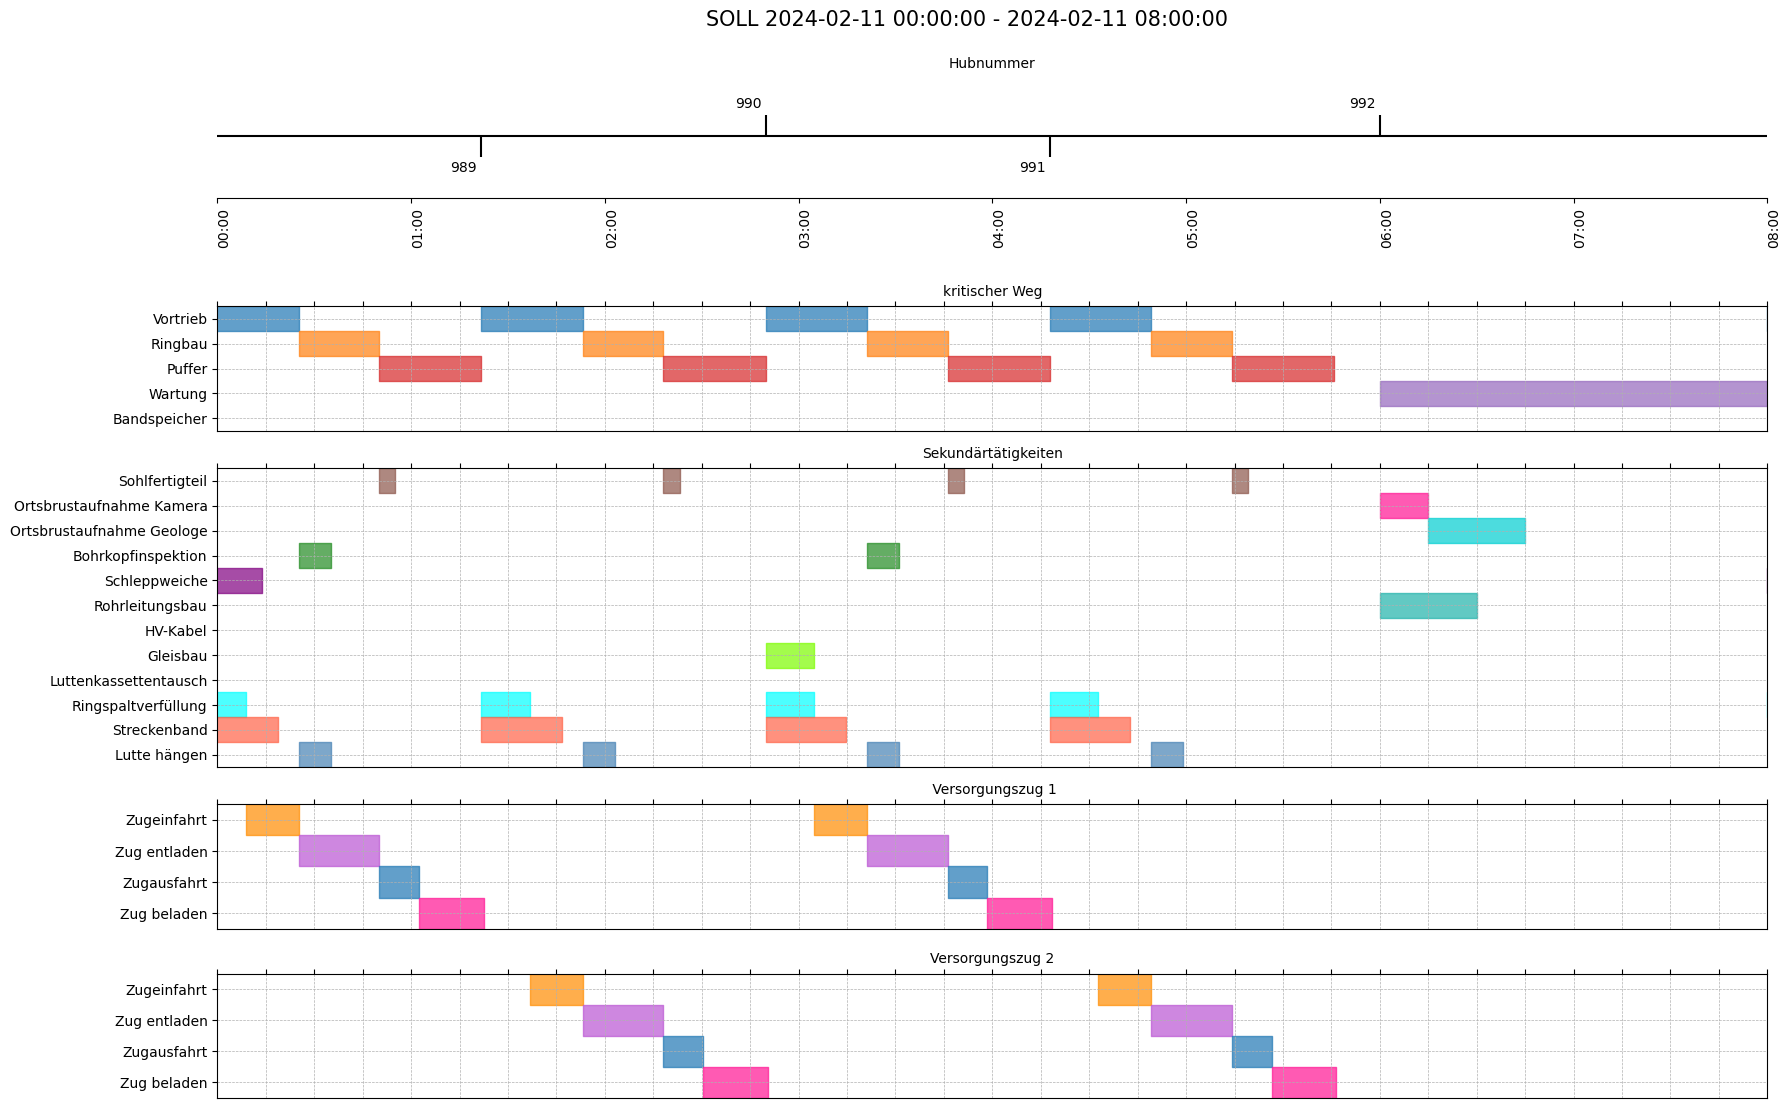

In [45]:
# Farben für die Balken
farben_k = ['#1f77b4', '#ff7f0e', '#d62728', '#9467bd', '#228b22']
farben_s = ['#8c564b', '#ff1493', '#00ced1', '#228b22', '#800080', '#20b2aa', '#dc143c',
            '#7cfc00', '#ffff00', '#00ffff', '#ff6347', '#4682b4']
farben_z = ['#ff8c00', '#ba55d3', '#1f77b4', '#ff1493']

intervall = 15
alle_15_min = betrachtungs_df['Zeitpunkt'][::intervall]

# Definiton des Höhenverhältnis
height_ratios = [5, 5, 12, 5, 5]

# Erstellt Abbildung mit Subplots (Zeilen, Spalte)
fig, axs = plt.subplots(5, 1, figsize=(20, 12), sharex=False, gridspec_kw={'height_ratios': height_ratios}) 
fig.text(0.5, 0.92, f"SOLL {start_bet_soll} - {ende_bet_soll}", ha='center', fontsize=15) # x-axis label


# Zeitstrahl Hubnummern/Stationierung (nicht gewünschtes auskommentieren)
betrachtung_df = betrachtungH_df
# betrachtung_df = betrachtungST_df

levels = np.tile([1, -1], int(np.ceil(len(betrachtung_df) / 2)))[:len(betrachtung_df)]

axs[0].vlines(betrachtung_df['Startzeitpunkt'], 0, levels, color="black")  # vertikale Striche
axs[0].plot(betrachtung_df['Startzeitpunkt'], np.zeros_like(betrachtung_df['Startzeitpunkt']), 
        color="black", markerfacecolor="w")

# Beschriftung der Linien
for d, l, r in zip(betrachtung_df['Startzeitpunkt'], levels, betrachtung_df['Hubnummer']):
    axs[0].annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top")

# X-Achse
axs[0].xaxis.tick_bottom()
axs[0].xaxis.set_label_position('bottom')

axs[0].xaxis.set_major_locator(mdates.HourLocator(interval=1))
axs[0].xaxis.set_major_formatter(mdates.DateFormatter("%H:%M")) #" %Y-%m-%d 
axs[0].set_xlim(start_bet_soll, ende_bet_soll)
plt.setp(axs[0].get_xticklabels(), rotation=90, ha="left")
axs[0].xaxis.set_label_position('top')
axs[0].set_xlabel('Hubnummer')
axs[0].xaxis.set_tick_params(bottom=True) 

# Y-Achse
axs[0].margins(y=1)
axs[0].yaxis.set_visible(False)
axs[0].spines[["left", "top", "right"]].set_visible(False)


# kritischer Weg
for idx, tätigkeit in enumerate(verschiedene_tätigkeiten_K):
    activity_data = betrachtetSOLLk_df[betrachtetSOLLk_df['Tätigkeit'] == tätigkeit]
    color = farben_k[idx % len(farben_k)]
    for i, row in activity_data.iterrows():
        axs[1].fill_betweenx([idx-0.5, idx+0.5], row['Startzeitpunkt'], row['Endzeitpunkt'], color=color, alpha=0.7)

# Y-Achse
axs[1].set_yticks(range(len(verschiedene_tätigkeiten_K)))
axs[1].set_yticklabels(verschiedene_tätigkeiten_K)
axs[1].set_ylim(-0.5, len(verschiedene_tätigkeiten_K) - 0.5)
axs[1].yaxis.grid(True, which='major', linestyle='--', linewidth=0.5)
axs[1].invert_yaxis()

# X-Achse
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
axs[1].xaxis.set_major_locator(mdates.HourLocator(interval=1))
axs[1].xaxis.set_minor_locator(mdates.MinuteLocator(interval=15))
axs[1].xaxis.grid(True, which='minor', linestyle='--', linewidth=0.5)
axs[1].xaxis.grid(True, which='major', linestyle='--', linewidth=0.5)
axs[1].set_xlim(start_bet_soll, ende_bet_soll)

axs[1].xaxis.set_label_position('top')
axs[1].set_xlabel('kritischer Weg')


axs[1].set_xticks(alle_15_min) # Teilstriche x-Achse
axs[1].set_xticklabels(alle_15_min, rotation=90)  
axs[1].xaxis.tick_top()
axs[1].tick_params(top=True, labeltop=False, bottom=False, labelbottom=False)


# Sekundärtätigkeiten
for idx, tätigkeit in enumerate(verschiedene_tätigkeiten_S):
    activity_data = betrachtetSOLLs_df[betrachtetSOLLs_df['Tätigkeit'] == tätigkeit]
    color = farben_s[idx % len(farben_s)]
    for i, row in activity_data.iterrows():
        axs[2].fill_betweenx([idx-0.5, idx+0.5], row['Startzeitpunkt'], row['Endzeitpunkt'], color=color, alpha=0.7)

# Y-Achse
axs[2].set_yticks(range(len(verschiedene_tätigkeiten_S)))
axs[2].set_yticklabels(verschiedene_tätigkeiten_S)
axs[2].set_ylim(-0.5, len(verschiedene_tätigkeiten_S) - 0.5)
axs[2].yaxis.grid(True, which='major', linestyle='--', linewidth=0.5)
axs[2].invert_yaxis()

# X-Achse
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
axs[2].xaxis.set_major_locator(mdates.HourLocator(interval=1))
axs[2].xaxis.set_minor_locator(mdates.MinuteLocator(interval=15))
axs[2].xaxis.grid(True, which='minor', linestyle='--', linewidth=0.5)
axs[2].xaxis.grid(True, which='major', linestyle='--', linewidth=0.5)
axs[2].set_xlim(start_bet_soll, ende_bet_soll)

axs[2].xaxis.set_label_position('top')
axs[2].set_xlabel('Sekundärtätigkeiten')

axs[2].set_xticks(alle_15_min) # Teilstriche x-Achse
axs[2].set_xticklabels(alle_15_min, rotation=90)  
axs[2].xaxis.tick_top()
axs[2].tick_params(top=True, labeltop=False, bottom=False, labelbottom=False)


# Versorgungszug 1
for idx, tätigkeit in enumerate(verschiedene_tätigkeiten_Z1):
    activity_data = betrachtetSOLLz1_df[betrachtetSOLLz1_df['Tätigkeit'] == tätigkeit]
    color = farben_z[idx % len(farben_z)]
    for i, row in activity_data.iterrows():
        axs[3].fill_betweenx([idx-0.5, idx+0.5], row['Startzeitpunkt'], row['Endzeitpunkt'], color=color, alpha=0.7)

# Y-Achse
axs[3].set_yticks(range(len(verschiedene_tätigkeiten_Z1)))
axs[3].set_yticklabels(verschiedene_tätigkeiten_Z1)
axs[3].set_ylim(-0.5, len(verschiedene_tätigkeiten_Z1) - 0.5)
axs[3].yaxis.grid(True, which='major', linestyle='--', linewidth=0.5)
axs[3].invert_yaxis()

# X-Achse
axs[3].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
axs[3].xaxis.set_major_locator(mdates.HourLocator(interval=1))
axs[3].xaxis.set_minor_locator(mdates.MinuteLocator(interval=15))
axs[3].xaxis.grid(True, which='minor', linestyle='--', linewidth=0.5)
axs[3].xaxis.grid(True, which='major', linestyle='--', linewidth=0.5)
axs[3].set_xlim(start_bet_soll, ende_bet_soll)

axs[3].xaxis.set_label_position('top')
axs[3].set_xlabel(' Versorgungszug 1')

axs[3].set_xticks(alle_15_min) # Teilstriche x-Achse
axs[3].set_xticklabels(alle_15_min, rotation=90)  
axs[3].xaxis.tick_top()
axs[3].tick_params(top=True, labeltop=False, bottom=False, labelbottom=False)


# Versorgungszug 2
for idx, tätigkeit in enumerate(verschiedene_tätigkeiten_Z2):
    activity_data = betrachtetSOLLz2_df[betrachtetSOLLz2_df['Tätigkeit'] == tätigkeit]
    color = farben_z[idx % len(farben_z)]
    for i, row in activity_data.iterrows():
        axs[4].fill_betweenx([idx-0.5, idx+0.5], row['Startzeitpunkt'], row['Endzeitpunkt'], color=color, alpha=0.7)

# Y-Achse
axs[4].set_yticks(range(len(verschiedene_tätigkeiten_Z2)))
axs[4].set_yticklabels(verschiedene_tätigkeiten_Z2)
axs[4].set_ylim(-0.5, len(verschiedene_tätigkeiten_Z2) - 0.5)
axs[4].yaxis.grid(True, which='major', linestyle='--', linewidth=0.5)
axs[4].invert_yaxis()

# X-Achse
axs[4].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
axs[4].xaxis.set_major_locator(mdates.HourLocator(interval=1))
axs[4].xaxis.set_minor_locator(mdates.MinuteLocator(interval=15))
axs[4].xaxis.grid(True, which='minor', linestyle='--', linewidth=0.5)
axs[4].xaxis.grid(True, which='major', linestyle='--', linewidth=0.5)
axs[4].set_xlim(start_bet_soll, ende_bet_soll)

axs[4].xaxis.set_label_position('top')
axs[4].set_xlabel('Versorgungszug 2')

axs[4].set_xticks(alle_15_min) # Teilstriche x-Achse
axs[4].set_xticklabels(alle_15_min, rotation=90)  
axs[4].xaxis.tick_top()

axs[4].tick_params(top=True, labeltop=False, bottom=False, labelbottom=False)


# Positionierung
pos0 = axs[0].get_position()
pos1 = axs[1].get_position()
pos2 = axs[2].get_position()
pos3 = axs[3].get_position()
pos4 = axs[4].get_position()

axs[1].set_position([pos1.x0, pos0.y0 - pos0.height - 0.09, pos0.width, pos1.height])
axs[2].set_position([pos2.x0, pos1.y0 - pos1.height - 0.24, pos1.width, pos2.height])
axs[3].set_position([pos3.x0, pos2.y0 - pos2.height + 0.046, pos2.width, pos3.height])
axs[4].set_position([pos4.x0, pos3.y0 - pos3.height - 0.11, pos3.width, pos4.height])


# Speichern des Schichtdiagramms
pfad = r'C:\Users\c8461417\Desktop\2024_02\00_neu\02_Skripte\01_SOLL'
dateiname = f"SOLL_{start_bet_soll.date()}.svg" 
os.makedirs(pfad, exist_ok=True) # Überprüft ob Pfad vorhanden
speicher_pfad = os.path.join(pfad, dateiname)

plt.savefig(speicher_pfad, bbox_inches='tight')

# 4 IST

## Import der Datei & Datenaufbereitung

Einlesen und aufbereiten des gewünschten IST

In [46]:
dateiname = f"{datum_importIST}.xlsx"
verzeichnispfad = r'C:\Users\c8461417\Desktop\2024_02\00_neu\02_Skripte\02_IST'
dateipfad = os.path.join(verzeichnispfad, dateiname)

aktuellerIST_df = pd.read_excel(dateipfad)

columns_to_drop = ['Dauer', 'Schicht', 'Kommentar', 'Interval Ende']
aktuellerIST_df = aktuellerIST_df.drop(columns_to_drop, axis=1)

# Umbenennung der Spalten
umbennenen_spalten = {'Aktivität Start': 'Startzeitpunkt', 'Aktivität Ende': 'Endzeitpunkt',
                      'Name': 'Tätigkeit', 'Interval Start': 'Hubnummer'}
aktuellerIST_df = aktuellerIST_df.rename(columns=umbennenen_spalten)

# Tätigkeiten umbennen
aktuellerIST_df[['part1', 'part2', 'part3']] = aktuellerIST_df['Code'].str.split('.', expand=True)

def gruppierung_tätigkeit(row):
    if row['part1'] == '7':
        return 'Losübergreifend'
    elif row['part1'] == '6':
        return 'Sonstige Maßnahmen'
    elif row['part1'] == '5' and row['part2'] == '3':
        return 'Geräteausfall Sonstiges'
    elif row['part1'] == '5' and row['part2'] == '2':
        return 'Geräteausfall Logistik'
    elif row['part1'] == '5' and row['part2'] == '1':
        return 'Geräteausfall TVM'
    elif row['part1'] == '4' and row['part2'] == '1':
        return 'Geräteausfall Lieferant TVM'
    elif row['part1'] == '4' and row['part2'] == '2':
        return 'Geräteausfall Lieferant Strecken-Förderband'
    elif row['part1'] == '2' and row['part2'] == '3':
        return 'Sonstiges geol. Bedingt'
    elif row['part1'] == '2' and row['part2'] == '2':
        return 'SM'
    elif row['part1'] == '2' and row['part2'] == '1':
        return 'ZM'
    elif row['part1'] == '1' and row['part2'] == '6':
        return 'Vortriebsbedingte Maßnahmen - Sonstiges'
    elif row['part1'] == '1' and row['part2'] == '5':
        return 'Vortriebsbedingte Maßnahmen - Störungen'  
    elif row['part1'] == '1' and row['part2'] == '3' and row['part3'] == '7':
        return 'Verlängerungen und Befüllungen'
    elif row['part1'] == '1' and row['part2'] == '3' and row['part3'] == '6':
        return 'Verlängerungen und Befüllungen'
    elif row['part1'] == '1' and row['part2'] == '3' and row['part3'] == '5':
        return 'Bandspeicher'
    elif row['part1'] == '1' and row['part2'] == '3' and row['part3'] == '4':
        return 'Luttenkassettentausch'
    elif row['part1'] == '1' and row['part2'] == '3' and row['part3'] == '3':
        return 'Gleisbau'
    elif row['part1'] == '1' and row['part2'] == '3' and row['part3'] == '2':
        return 'HV-Kabel'
    elif row['part1'] == '1' and row['part2'] == '3' and row['part3'] == '1':
        return 'Rohrleitungsbau'
    elif row['part1'] == '1' and row['part2'] == '3' and row['part3'] == '4':
        return 'Verlängerungen und Befüllungen'
    elif row['part1'] == '1' and row['part2'] == '2':
        return 'Vortriebsbedingte Maßnahmen - Regelmaßnahmen'
    elif row['part1'] == '1' and row['part2'] == '1' and row['part3'] == '13':
        return 'Vortriebsbedingte Maßnahmen - Allgemein'
    elif row['part1'] == '1' and row['part2'] == '1' and row['part3'] == '12':
        return 'Schleppweiche'
    elif row['part1'] == '1' and row['part2'] == '1' and row['part3'] == '11':
        return 'Vortriebsbedingte Maßnahmen - Allgemein'
    elif row['part1'] == '1' and row['part2'] == '1' and row['part3'] == '10':
        return 'Bohrkopfinspektion'
    elif row['part1'] == '1' and row['part2'] == '1' and row['part3'] == '9':
        return 'Ortsbrustaufnahme Geologe'
    elif row['part1'] == '1' and row['part2'] == '1' and row['part3'] == '8':
        return 'Ortsbrustaufnahme Kamera'
    elif row['part1'] == '1' and row['part2'] == '1' and row['part3'] == '7':
        return 'Vortriebsbedingte Maßnahmen - Allgemein'
    elif row['part1'] == '1' and row['part2'] == '1' and row['part3'] == '6':
        return 'Vortriebsbedingte Maßnahmen - Allgemein'
    elif row['part1'] == '1' and row['part2'] == '1' and row['part3'] == '5':
        return 'Sohlfertigteil'
    elif row['part1'] == '1' and row['part2'] == '1' and row['part3'] == '4':
        return 'Vortriebsbedingte Maßnahmen - Allgemein'
    elif row['part1'] == '1' and row['part2'] == '1' and row['part3'] == '3':
        return 'Wartung'
    elif row['part1'] == '1' and row['part2'] == '1' and row['part3'] == '2':
        return 'Vortriebsbedingte Maßnahmen - Allgemein'
    elif row['part1'] == '1' and row['part2'] == '1' and row['part3'] == '1':
        return 'Vortriebsbedingte Maßnahmen - Allgemein'
    else:
        return row['Tätigkeit']

aktuellerIST_df['Tätigkeit'] = aktuellerIST_df.apply(gruppierung_tätigkeit, axis=1)

# Löschen der Spalten
columns_to_drop = ['part1', 'part2', 'part3', 'Code']
aktuellerIST_df = aktuellerIST_df.drop(columns_to_drop, axis=1)

new_order = ['Hubnummer', 'Tätigkeit', 'Startzeitpunkt', 'Endzeitpunkt']
aktuellerIST_df = aktuellerIST_df[new_order]

Abfrage, ob DataFrame bereits existiert oder nicht. 
Wenn nicht exisitiert wird DateFrame erstellt, ansonsten exisiternder geöffnet.

In [47]:
dateiname = 'IST_gesammelt.xlsx'
verzeichnispfad = r'C:\Users\c8461417\Desktop\2024_02\00_neu\02_Skripte\02_IST'
dateipfad = os.path.join(verzeichnispfad, dateiname)

if os.path.exists(dateipfad):
    gesammeltIST_df = pd.read_excel(dateipfad)

else:

    gesammeltIST_df = pd.DataFrame()
    
    gesammeltIST_df['Startzeitpunkt'] = []
    gesammeltIST_df['Endzeitpunkt'] = []
    gesammeltIST_df['Code'] = []
    gesammeltIST_df['Tätigkeit'] = []
    gesammeltIST_df['Hubnummer'] = []

    gesammeltIST_df.to_excel(dateipfad, index=False)

Zusammenfügen des IST_gesammelt und importiertem IST

In [48]:
gesammeltIST_df['Startzeitpunkt'] = pd.to_datetime(gesammeltIST_df['Startzeitpunkt'], errors='coerce')
aktuellerIST_df['Startzeitpunkt'] = pd.to_datetime(aktuellerIST_df['Startzeitpunkt'], errors='coerce')

# abfrage, welche Daten im DataFrame gesammeltIST_df schon exisitieren
existing_dates = gesammeltIST_df['Startzeitpunkt'].dt.date

# filtern der Zeilen, welche bereits im DataFrame aktuellerIST_df exisitieren
new_rows = aktuellerIST_df[~aktuellerIST_df['Startzeitpunkt'].dt.date.isin(existing_dates)]

if new_rows.empty:
    print("DataFrame wurde nicht hinzugefügt, da bereits dasselbe Datum existiert.")
else:
    # Concatenate only new rows
    gesammeltIST_df = pd.concat([gesammeltIST_df, new_rows])

    # Save to Excel
    dateiname = 'IST_gesammelt.xlsx'
    verzeichnispfad = r'C:\Users\c8461417\Desktop\2024_02\IST'
    dateipfad = os.path.join(verzeichnispfad, dateiname)

    # Save the result to Excel file
    gesammeltIST_df.to_excel(dateipfad, index=False)

C:\Users\c8461417\AppData\Local\Temp\ipykernel_7256\3605342473.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  gesammeltIST_df = pd.concat([gesammeltIST_df, new_rows])


## visualisiertes IST

In [49]:
startdatum = aktuellerIST_df['Startzeitpunkt'].min().date()
startzeit = time (0,0,0)
startzeitpunkt_ist = datetime.combine(startdatum, startzeit)
endzeitpunkt_ist = startzeitpunkt_ist + pd.Timedelta(hours=8)
date_range = pd.date_range(start=startzeitpunkt_ist, end=endzeitpunkt_ist , freq='min')

In [50]:
betrachtungsIST_df = pd.DataFrame(columns=['Zeitpunkt'])
betrachtungsIST_df['Zeitpunkt'] = date_range

DataFrame für Hubnummern bzw. Stationierung

In [51]:
# Stationierung abrufen
betrachtung_df = aktuellerIST_df
betrachtung_df = pd.merge(betrachtung_df, hubliste_df, left_on='Hubnummer', right_on='Hubnummer', how='left')

# Spalten Tätigkeiten entfernen
columns_to_keep = ['Hubnummer', 'Startzeitpunkt', 'Stationierung']
betrachtung_df = betrachtung_df[columns_to_keep]

# nach neuem Hub
betrachtungH_df = betrachtung_df[betrachtung_df['Hubnummer'] > betrachtung_df['Hubnummer'].shift(1)]
betrachtungH_df.reset_index(drop=True, inplace=True)
betrachtungH_df.drop(columns='Stationierung', inplace=True, errors='ignore')

# nach neuer Station
betrachtungST_df = betrachtung_df[betrachtung_df['Hubnummer'] > betrachtung_df['Hubnummer'].shift(1)]
betrachtungST_df.reset_index(drop=True, inplace=True)
betrachtungST_df.drop(columns='Hubnummer', inplace=True, errors='ignore')

C:\Users\c8461417\AppData\Local\Temp\ipykernel_7256\789716364.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  betrachtungH_df.drop(columns='Stationierung', inplace=True, errors='ignore')
C:\Users\c8461417\AppData\Local\Temp\ipykernel_7256\789716364.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  betrachtungST_df.drop(columns='Hubnummer', inplace=True, errors='ignore')


Tätigkeiten

In [52]:
# Beschriftung der Diagramme
anzahl_tätigkeiten_Ik = 4
verschiedene_tätigkeiten_Ik = ['Vortrieb', 'Ringbau', 'Puffer', 'Wartung', 'Bandspeicher']    

anzahl_tätigkeiten_Is = 25
verschiedene_tätigkeiten_Is = ['Sohlfertigteil', 'Ortsbrustaufnahme Kamera', 'Ortsbrustaufnahme Geologe',
                               'Bohrkopfinspektion', 'Schleppweiche', 'Rohrleitungsbau', 'HV-Kabel', 'Gleisbau',
                               'Luttenkassettentausch', 'Ringspaltverfüllung', 'Streckenband', 'Lutte hängen',
                               'Ausfallzeit', 'Vortriebsbedingte Maßnahmen - Allgemein', 
                               'Vortriebsbedingte Maßnahmen - Regelmaßnahmen', 'Verlängerungen und Befüllungen',
                               'Vortriebsbedingte Maßnahmen - Störungen', 'Vortriebsbedingte Maßnahmen - Sonstiges',
                               'Zusatzmaßnahmen', 'Sondermaßnahmen', 'Sonstiges geol. Bedingt', 'Geräteausfall Lieferant TVM',
                               'Geräteausfall Lieferant Strecken-Förderband', 'Geräteausfall TVM', 'Geräteausfall Logistik',
                               'Geräteausfall Sonstiges', 'Sonstige Maßnahmen', 'Losübergreifend']

Plot <span style="color:orange"> (nicht gewünschtes auskommentieren betrachtung_df ) </span>

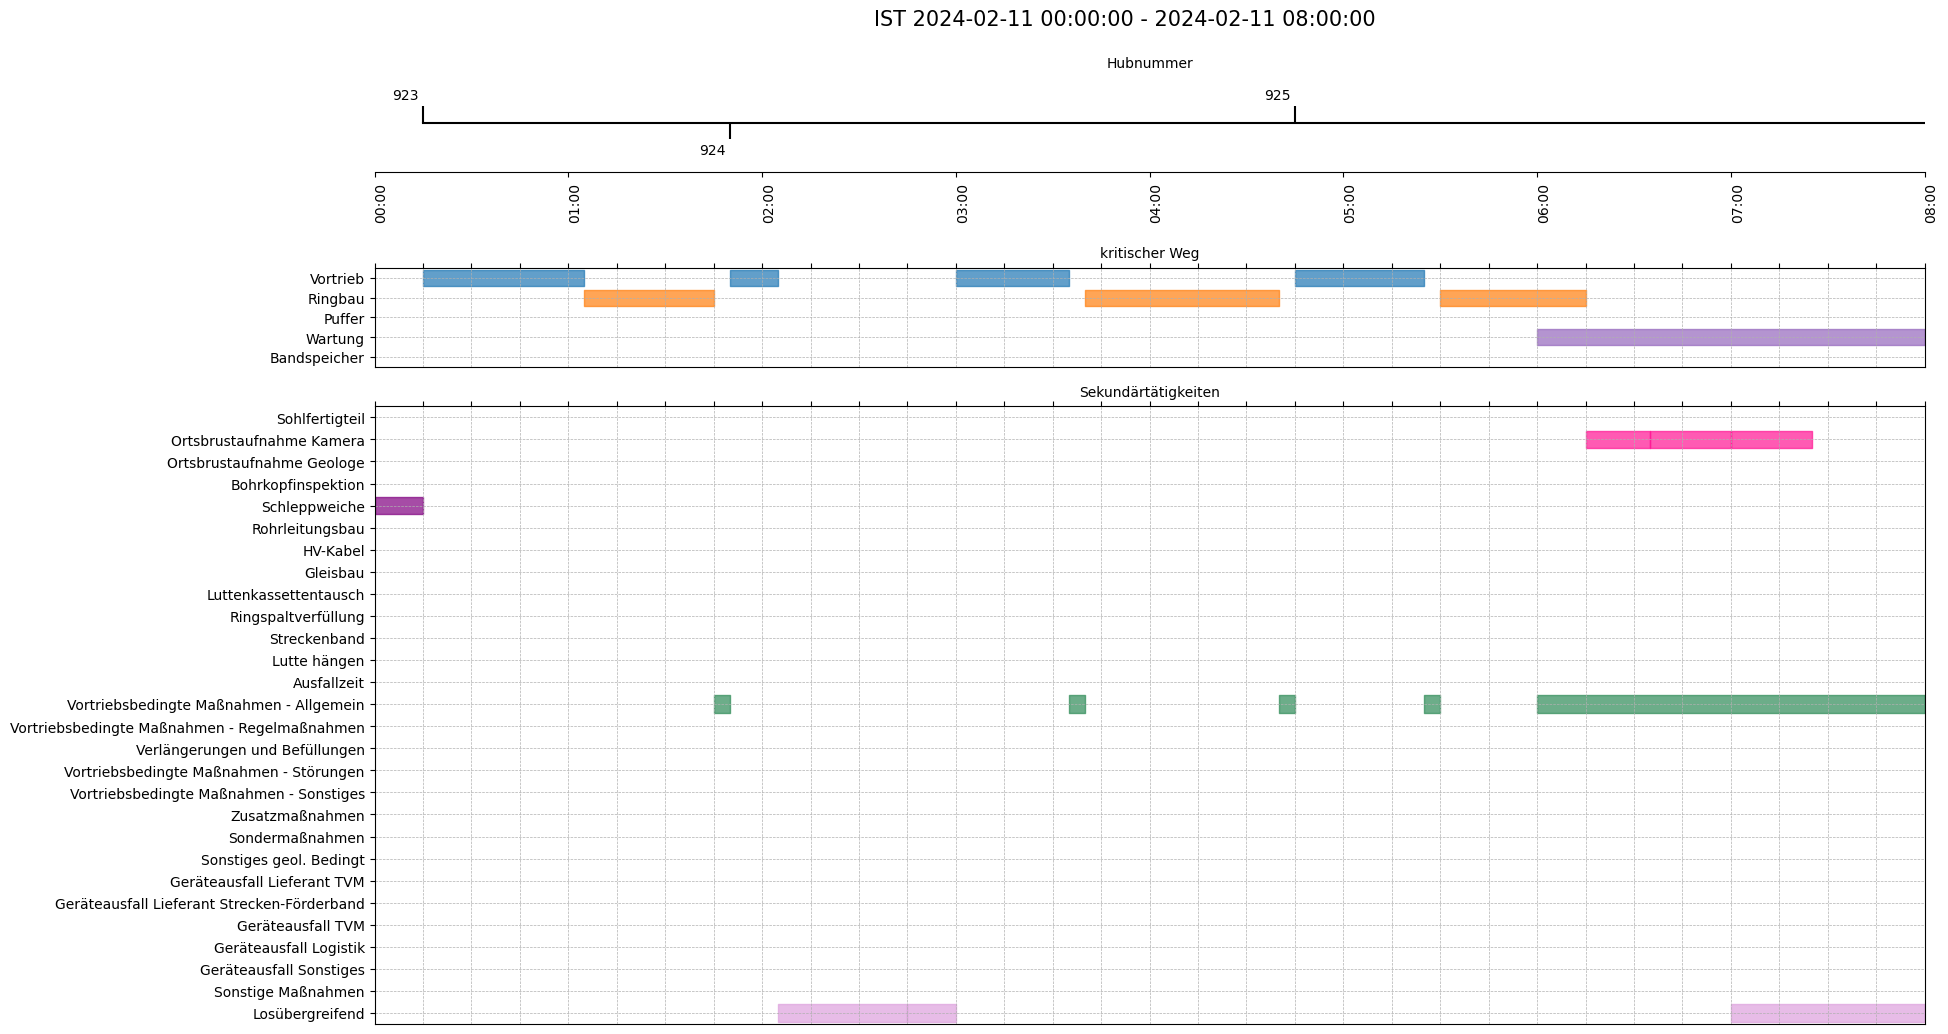

In [53]:
# Farben für die Balken
farben_k = ['#1f77b4', '#ff7f0e', '#d62728', '#9467bd']
farben_s = [    '#8c564b', '#ff1493', '#00ced1', '#228b22', '#800080', '#20b2aa', '#dc143c', '#7cfc00', '#ffff00', '#00ffff',
    '#ff6347', '#4682b4', '#ff4500', '#2e8b57', '#daa520', '#adff2f', '#4b0082', '#f0e68c', '#8b4513', '#fa8072',
    '#6495ed', '#b0c4de', '#ffb6c1', '#6a5acd', '#ffdab9', '#ffd700', '#cd5c5c', '#dda0dd', '#5f9ea0']
farben_z = ['#ff8c00', '#ba55d3', '#1f77b4', '#ff1493', '#228b22']

intervall = 15
alle_15_min = betrachtungsIST_df['Zeitpunkt'][::intervall]


# Definiton des Höhenverhältnis
height_ratios = [4, 4, 25]

# Erstellt Abbildung mit Subplots (Zeilen, Spalte)
fig, axs = plt.subplots(3, 1, figsize=(20, 12), sharex=False, gridspec_kw={'height_ratios': height_ratios})

fig.text(0.5, 0.92, f"IST {startzeitpunkt_ist} - {endzeitpunkt_ist}", ha='center', fontsize=15) # x-axis label


# Zeitstrahl Hubnummern/Stationierung (nicht gewünschtes auskommentieren)
betrachtung_df = betrachtungH_df
# betrachtung_df = betrachtungST_df

levels = np.tile([1, -1], int(np.ceil(len(betrachtung_df) / 2)))[:len(betrachtung_df)]

axs[0].vlines(betrachtung_df['Startzeitpunkt'], 0, levels, color="black")  # vertikale Striche
axs[0].plot(betrachtung_df['Startzeitpunkt'], np.zeros_like(betrachtung_df['Startzeitpunkt']), 
        color="black", markerfacecolor="w")

# Beschriftung der Linien
for d, l, r in zip(betrachtung_df['Startzeitpunkt'], levels, betrachtung_df['Hubnummer']):
    axs[0].annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top")

# X-Achse
axs[0].xaxis.tick_bottom()
axs[0].xaxis.set_label_position('bottom')

axs[0].xaxis.set_major_locator(mdates.HourLocator(interval=1))
axs[0].xaxis.set_major_formatter(mdates.DateFormatter("%H:%M")) #" %Y-%m-%d 
axs[0].set_xlim(startzeitpunkt_ist, endzeitpunkt_ist)
plt.setp(axs[0].get_xticklabels(), rotation=90, ha="left")
axs[0].xaxis.set_label_position('top')
axs[0].set_xlabel('Hubnummer')
axs[0].xaxis.set_tick_params(bottom=True) 

# Y-Achse
axs[0].margins(y=1)
axs[0].yaxis.set_visible(False)
axs[0].spines[["left", "top", "right"]].set_visible(False)


# kritischer Weg
for idx, tätigkeit in enumerate(verschiedene_tätigkeiten_Ik):
    activity_data = aktuellerIST_df[aktuellerIST_df['Tätigkeit'] == tätigkeit]
    color = farben_k[idx % len(farben_k)]
    for i, row in activity_data.iterrows():
        axs[1].fill_betweenx([idx-0.4, idx+0.4], row['Startzeitpunkt'], row['Endzeitpunkt'], color=color, alpha=0.7)

# Y-Achse
axs[1].set_yticks(range(len(verschiedene_tätigkeiten_Ik)))
axs[1].set_yticklabels(verschiedene_tätigkeiten_Ik)
axs[1].set_ylim(-0.5, len(verschiedene_tätigkeiten_Ik) - 0.5)
axs[1].yaxis.grid(True, which='major', linestyle='--', linewidth=0.5)
axs[1].invert_yaxis()

# X-Achse
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
axs[1].xaxis.set_major_locator(mdates.HourLocator(interval=1))
axs[1].xaxis.set_minor_locator(mdates.MinuteLocator(interval=15))
axs[1].xaxis.grid(True, which='minor', linestyle='--', linewidth=0.5)
axs[1].xaxis.grid(True, which='major', linestyle='--', linewidth=0.5)
axs[1].set_xlim(startzeitpunkt_ist, endzeitpunkt_ist)

axs[1].xaxis.set_label_position('top')
axs[1].set_xlabel('kritischer Weg')

axs[1].set_xticks(alle_15_min) # Teilstriche x-Achse
axs[1].set_xticklabels(alle_15_min, rotation=90)  
axs[1].xaxis.tick_top()
axs[1].tick_params(top=True, labeltop=False, bottom=False, labelbottom=False)


# Sekundärtätigkeiten
for idx, tätigkeit in enumerate(verschiedene_tätigkeiten_Is):
    activity_data = aktuellerIST_df[aktuellerIST_df['Tätigkeit'] == tätigkeit]
    color = farben_s[idx % len(farben_s)]
    for i, row in activity_data.iterrows():
        axs[2].fill_betweenx([idx-0.4, idx+0.4], row['Startzeitpunkt'], row['Endzeitpunkt'], color=color, alpha=0.7)

# Y-Achse

axs[2].set_yticks(range(len(verschiedene_tätigkeiten_Is)))
axs[2].set_yticklabels(verschiedene_tätigkeiten_Is)
axs[2].set_ylim(-0.5, len(verschiedene_tätigkeiten_Is) - 0.5)
axs[2].yaxis.grid(True, which='major', linestyle='--', linewidth=0.5)
axs[2].invert_yaxis()

# X-Achse
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
axs[2].xaxis.set_major_locator(mdates.HourLocator(interval=1))
axs[2].xaxis.set_minor_locator(mdates.MinuteLocator(interval=15))
axs[2].xaxis.grid(True, which='minor', linestyle='--', linewidth=0.5)
axs[2].xaxis.grid(True, which='major', linestyle='--', linewidth=0.5)
axs[2].set_xlim(startzeitpunkt_ist, endzeitpunkt_ist)

axs[2].xaxis.set_label_position('top')
axs[2].set_xlabel('Sekundärtätigkeiten')

axs[2].set_xticks(alle_15_min) # Teilstriche x-Achse
axs[2].set_xticklabels(alle_15_min, rotation=90)  
axs[2].xaxis.tick_top()

axs[2].tick_params(top=True, labeltop=False, bottom=False, labelbottom=False)



# Positionierung
plt.subplots_adjust(hspace=0.2)

pos0 = axs[0].get_position()
pos1 = axs[1].get_position()
pos2 = axs[2].get_position()

axs[1].set_position([pos1.x0, pos0.y0 - pos0.height - 0.08, pos0.width, pos1.height])
axs[2].set_position([pos2.x0, pos1.y0 - pos1.height - 0.5, pos1.width, pos2.height])


# Speichern des Schichtdiagramms
pfad = r'C:\Users\c8461417\Desktop\2024_02\00_neu\02_Skripte\02_IST'
dateiname = f"{startzeitpunkt_ist.date()}.svg" 
# Überprüft ob Pfad vorhanden
os.makedirs(pfad, exist_ok=True)
speicher_pfad = os.path.join(pfad, dateiname)
# plt.savefig(save_path)
plt.savefig(speicher_pfad, bbox_inches='tight')


## Tätigkeitszuweisung IST

Umwandlung eingelesen IST in Prozesszuweisung

In [54]:
# Erstellung neuer DataFrame
taetigkeitszuweisungIST_df = pd.DataFrame()

# Spalte Hubnummern
taetigkeitszuweisungIST_df['Hubnummer'] = pd.Series(aktuellerIST_df['Hubnummer'].unique())


# Definiton der Abfragefunktionen 
def zuweisung_VT(row):
    vt_assigned = any((aktuellerIST_df['Tätigkeit'] == 'Vortrieb') & (aktuellerIST_df['Hubnummer'] == row['Hubnummer']))
    return int(vt_assigned)
def zuweisung_RB(row):
    vt_assigned = any((aktuellerIST_df['Tätigkeit'] == 'Ringbau') & (aktuellerIST_df['Hubnummer'] == row['Hubnummer']))
    return int(vt_assigned)
def zuweisung_BSP(row):
    vt_assigned = any((aktuellerIST_df['Tätigkeit'] == 'Bandspeicher') & (aktuellerIST_df['Hubnummer'] == row['Hubnummer']))
    return int(vt_assigned)
def zuweisung_SFT(row):
    vt_assigned = any((aktuellerIST_df['Tätigkeit'] == 'Sohlfertigteil') & (aktuellerIST_df['Hubnummer'] == row['Hubnummer']))
    return int(vt_assigned)
def zuweisung_SW(row):
    vt_assigned = any((aktuellerIST_df['Tätigkeit'] == 'Schleppweiche') & (aktuellerIST_df['Hubnummer'] == row['Hubnummer']))
    return int(vt_assigned)
def zuweisung_GB(row):
    vt_assigned = any((aktuellerIST_df['Tätigkeit'] == 'Gleisbau') & (aktuellerIST_df['Hubnummer'] == row['Hubnummer']))
    return int(vt_assigned)
def zuweisung_BKI(row):
    vt_assigned = any((aktuellerIST_df['Tätigkeit'] == 'Bohrkopfinspektion') & (aktuellerIST_df['Hubnummer'] == row['Hubnummer']))
    return int(vt_assigned)
def zuweisung_LK(row):
    vt_assigned = any((aktuellerIST_df['Tätigkeit'] == 'Luttenkassettentausch') & (aktuellerIST_df['Hubnummer'] == row['Hubnummer']))
    return int(vt_assigned)

# Zuordnung zu Spalten über definierte Funktionen
taetigkeitszuweisungIST_df['Vortrieb'] = taetigkeitszuweisungIST_df.apply(zuweisung_VT, axis=1)
taetigkeitszuweisungIST_df['Ringbau'] = taetigkeitszuweisungIST_df.apply(zuweisung_RB, axis=1)
taetigkeitszuweisungIST_df['Bandspeicher'] = taetigkeitszuweisungIST_df.apply(zuweisung_BSP, axis=1)
taetigkeitszuweisungIST_df['Sohlfertigteil'] = taetigkeitszuweisungIST_df.apply(zuweisung_SFT, axis=1)
taetigkeitszuweisungIST_df['Schleppweiche'] = taetigkeitszuweisungIST_df.apply(zuweisung_SW, axis=1)
taetigkeitszuweisungIST_df['Gleisbau'] = taetigkeitszuweisungIST_df.apply(zuweisung_GB, axis=1)
taetigkeitszuweisungIST_df['Bohrkopfinspektion'] = taetigkeitszuweisungIST_df.apply(zuweisung_BKI, axis=1)
taetigkeitszuweisungIST_df['Luttenkassettentausch'] = taetigkeitszuweisungIST_df.apply(zuweisung_LK, axis=1)

Abfrage, ob DataFrame bereits existiert oder nicht. Wenn nicht exisitiert wird DateFrame erstellt, ansonsten wird exisitierender geöffnet.

In [55]:
# Dateipfad und Name festlegen
dateiname = 'tIST_gesammelt.xlsx'
verzeichnispfad = r'C:\Users\c8461417\Desktop\2024_02\00_neu\02_Skripte\02_IST'
dateipfad = os.path.join(verzeichnispfad, dateiname)

if os.path.exists(dateipfad):
    tIST_gesammelt_df = pd.read_excel(dateipfad)

else:

    tIST_gesammelt_df = pd.DataFrame()

    tIST_gesammelt_df['Hubnummer'] = []
    tIST_gesammelt_df['Stationierung'] = []
    tIST_gesammelt_df['Vortrieb'] = []
    tIST_gesammelt_df['Ringbau'] = []
    tIST_gesammelt_df['Puffer'] = []
    # pIST_gesammelt_df['Wartung'] = []
    tIST_gesammelt_df['Bandspeicher'] = []
    tIST_gesammelt_df['Sohlfertigteil'] = []
    # pIST_gesammelt_df['Ortsbrustaufnahme Kamera'] = []
    # pIST_gesammelt_df['Ortsbrustaufnahme Geologe'] = []
    tIST_gesammelt_df['Schleppweiche'] = []
    # pIST_gesammelt_df['Rohrleitungsbau'] = []
    # pIST_gesammelt_df['HV-Kabel'] = []
    tIST_gesammelt_df['Gleisbau'] = []
    tIST_gesammelt_df['Bohrkopfinspektion'] = []

    tIST_gesammelt_df.to_excel(dateipfad, index=False)

Zusammenfügen der gesammelten Tätigkeitszuweisung mit der aktuellen Tätigkeitzuweisung und speichern

In [56]:
tIST_gesammelt_df = pd.concat([tIST_gesammelt_df, taetigkeitszuweisungIST_df])

dateiname = 'tIST_gesammelt.xlsx'
verzeichnispfad = r'C:\Users\c8461417\Desktop\2024_02\00_neu\02_Skripte\02_IST'
dateipfad = os.path.join(verzeichnispfad, dateiname)

tIST_gesammelt_df.to_excel(dateipfad, index=False)

In [57]:
tIST_gesammelt_df[0:30]

,Hubnummer,Stationierung,Vortrieb,Ringbau,Puffer,Bandspeicher,Sohlfertigteil,Schleppweiche,Gleisbau,Bohrkopfinspektion,Luttenkassettentausch
0,922.0,NaN,0.0,0.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0
1,923.0,NaN,1.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,924.0,NaN,1.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
3,925.0,NaN,1.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
4,926.0,NaN,1.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
5,927.0,NaN,1.0,1.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0
6,928.0,NaN,1.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
7,929.0,NaN,1.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
8,930.0,NaN,1.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0
9,931.0,NaN,1.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0


# 5 SOLLTE Arbeitsvorschau

## Tätigkeitszuweisung SOLLTE

Aufbereiten des DataFrames

In [58]:
# Neuer DataFrame
taetigkeitszuweisungSOLLTE_df = hubliste_df.copy()

# Filter des gewünschten Berchnungsraums
startHNR = int(tIST_gesammelt_df['Hubnummer'].max())-1
maxHNR = startHNR + hubnummer_sollte
taetigkeitszuweisungSOLLTE_df = taetigkeitszuweisungSOLLTE_df.iloc[startHNR:maxHNR]
taetigkeitszuweisungSOLLTE_df.reset_index(drop=True, inplace=True)

Abfrage des letzten Vorkommens gewisser Tätigkeiten

In [59]:
HNR_BSP_IST = taetigkeitszuweisungIST_df[taetigkeitszuweisungIST_df['Bandspeicher'] == 1]['Hubnummer'].max()
if pd.isna(HNR_BSP_IST):
    HNR_BSP_IST = 0
HNR_SW_IST = taetigkeitszuweisungIST_df[taetigkeitszuweisungIST_df['Schleppweiche'] == 1]['Hubnummer'].max()
if pd.isna(HNR_SW_IST):
    HNR_SW_IST = 0
HNR_GB_IST = taetigkeitszuweisungIST_df[taetigkeitszuweisungIST_df['Gleisbau'] == 1]['Hubnummer'].max()
if pd.isna(HNR_GB_IST):
    HNR_GB_IST = 0
HNR_BKI_IST = taetigkeitszuweisungIST_df[taetigkeitszuweisungIST_df['Bohrkopfinspektion'] == 1]['Hubnummer'].max()    
if pd.isna(HNR_BKI_IST):
    HNR_BKI_IST = 0
HNR_LK_IST = taetigkeitszuweisungIST_df[taetigkeitszuweisungIST_df['Luttenkassettentausch'] == 1]['Hubnummer'].max()    
if pd.isna(HNR_LK_IST):
    HNR_LK_IST = 0

Berechnen der neuen Werte für existierende Spalten

In [60]:
# Spalten befüllen
taetigkeitszuweisungSOLLTE_df.loc[taetigkeitszuweisungSOLLTE_df['Hubnummer'] % intervall_VT == 0, 'Vortrieb'] = 1
taetigkeitszuweisungSOLLTE_df.loc[taetigkeitszuweisungSOLLTE_df['Hubnummer'] % intervall_RB == 0, 'Ringbau'] = 1
taetigkeitszuweisungSOLLTE_df.loc[taetigkeitszuweisungSOLLTE_df['Hubnummer'] % intervall_puffer == 0, 'Puffer'] = 1
taetigkeitszuweisungSOLLTE_df['Bandspeicher'] = 0
taetigkeitszuweisungSOLLTE_df.loc[(taetigkeitszuweisungSOLLTE_df['Hubnummer'] - HNR_BSP_IST) % intervall_BSP == 0,
                                  'Bandspeicher'] = 1
taetigkeitszuweisungSOLLTE_df.loc[taetigkeitszuweisungSOLLTE_df['Hubnummer'] % intervall_RS == 0, 'Ringspaltverfüllung'] = 1
taetigkeitszuweisungSOLLTE_df['Bohrkopfinspektion'] = 0
taetigkeitszuweisungSOLLTE_df.loc[(taetigkeitszuweisungSOLLTE_df['Hubnummer'] - HNR_BKI_IST) % intervall_BKI == 0,
                                  'Bohrkopfinspektion'] = 1
taetigkeitszuweisungSOLLTE_df['Gleisbau'] = 0
taetigkeitszuweisungSOLLTE_df.loc[(taetigkeitszuweisungSOLLTE_df['Hubnummer'] - HNR_GB_IST) % intervall_GB == 0, 'Gleisbau'] = 1
taetigkeitszuweisungSOLLTE_df['Schleppweiche'] = 0
taetigkeitszuweisungSOLLTE_df.loc[(taetigkeitszuweisungSOLLTE_df['Hubnummer'] - HNR_SW_IST) % intervall_SW == 0,
                                  'Schleppweiche'] = 1
taetigkeitszuweisungSOLLTE_df.loc[taetigkeitszuweisungSOLLTE_df['Hubnummer'] % intervall_SF == 0, 'Sohlfertigteil'] = 1
taetigkeitszuweisungSOLLTE_df.loc[taetigkeitszuweisungSOLLTE_df['Hubnummer'] % intervall_LH == 0, 'Lutte hängen'] = 1
taetigkeitszuweisungSOLLTE_df.loc[taetigkeitszuweisungSOLLTE_df['Hubnummer'] % intervall_STB == 0, 'Streckenband'] = 1
taetigkeitszuweisungSOLLTE_df['Luttenkassettentausch'] = 0
taetigkeitszuweisungSOLLTE_df.loc[(taetigkeitszuweisungSOLLTE_df['Hubnummer'] - HNR_LK_IST) % intervall_LK == 0, 'Luttenkassettentausch'] = 1
taetigkeitszuweisungSOLLTE_df['HV-Kabel'] = 0
taetigkeitszuweisungSOLLTE_df.loc[taetigkeitszuweisungSOLLTE_df['Hubnummer'] % intervall_HV == 0, 'HV-Kabel'] = 1

Tätigkeiten, welche jeden Hub auftreten und für den letzten Hub bereits ausgeführt wurden, werden 0 gesetzt

In [61]:
for idx, row in taetigkeitszuweisungSOLLTE_df.iterrows():
    matching_row = taetigkeitszuweisungIST_df[taetigkeitszuweisungIST_df['Hubnummer'] == row['Hubnummer']]
    
    if not matching_row.empty and matching_row.iloc[0]['Vortrieb'] == 1:
        taetigkeitszuweisungSOLLTE_df.at[idx, 'Vortrieb'] = 0
        
for idx, row in taetigkeitszuweisungSOLLTE_df.iterrows():
    matching_row = taetigkeitszuweisungIST_df[taetigkeitszuweisungIST_df['Hubnummer'] == row['Hubnummer']]
    
    if not matching_row.empty and matching_row.iloc[0]['Ringbau'] == 1:
        taetigkeitszuweisungSOLLTE_df.at[idx, 'Ringbau'] = 0

for idx, row in taetigkeitszuweisungSOLLTE_df.iterrows():
    matching_row = taetigkeitszuweisungIST_df[taetigkeitszuweisungIST_df['Hubnummer'] == row['Hubnummer']]
    
    if not matching_row.empty and matching_row.iloc[0]['Bandspeicher'] == 1:
        taetigkeitszuweisungSOLLTE_df.at[idx, 'Bandspeicher'] = 0     
        
for idx, row in taetigkeitszuweisungSOLLTE_df.iterrows():
    matching_row = taetigkeitszuweisungIST_df[taetigkeitszuweisungIST_df['Hubnummer'] == row['Hubnummer']]
    
    if not matching_row.empty and matching_row.iloc[0]['Sohlfertigteil'] == 1:
        taetigkeitszuweisungSOLLTE_df.at[idx, 'Sohlfertigteil'] = 0
        
for idx, row in taetigkeitszuweisungSOLLTE_df.iterrows():
    matching_row = taetigkeitszuweisungIST_df[taetigkeitszuweisungIST_df['Hubnummer'] == row['Hubnummer']]
    
    if not matching_row.empty and matching_row.iloc[0]['Bohrkopfinspektion'] == 1:
        taetigkeitszuweisungSOLLTE_df.at[idx, 'Bohrkopfinspektion'] = 0
               
for idx, row in taetigkeitszuweisungSOLLTE_df.iterrows():
    matching_row = taetigkeitszuweisungIST_df[taetigkeitszuweisungIST_df['Hubnummer'] == row['Hubnummer']]
    
    if not matching_row.empty and matching_row.iloc[0]['Schleppweiche'] == 1:
        taetigkeitszuweisungSOLLTE_df.at[idx, 'Schleppweiche'] = 0

for idx, row in taetigkeitszuweisungSOLLTE_df.iterrows():
    matching_row = taetigkeitszuweisungIST_df[taetigkeitszuweisungIST_df['Hubnummer'] == row['Hubnummer']]
    
    if not matching_row.empty and matching_row.iloc[0]['Gleisbau'] == 1:
        taetigkeitszuweisungSOLLTE_df.at[idx, 'Gleisbau'] = 0     

Einfügen neuer Spalten

In [62]:
# in jedem Hub auftretende Tätigkeiten
taetigkeitszuweisungSOLLTE_df['Ringspaltverfüllung'] = 1
taetigkeitszuweisungSOLLTE_df['Lutte hängen'] = 1
taetigkeitszuweisungSOLLTE_df['Streckenband'] = 1

# Versorgungszug
taetigkeitszuweisungSOLLTE_df.loc[taetigkeitszuweisungSOLLTE_df['Hubnummer'] % 2 == 0, 'Zugeinfahrt'] = 1
taetigkeitszuweisungSOLLTE_df.loc[taetigkeitszuweisungSOLLTE_df['Hubnummer'] % 2 != 0, 'Zugeinfahrt'] = 2

taetigkeitszuweisungSOLLTE_df.loc[taetigkeitszuweisungSOLLTE_df['Hubnummer'] % 2 == 0, 'Zug entladen'] = 1
taetigkeitszuweisungSOLLTE_df.loc[taetigkeitszuweisungSOLLTE_df['Hubnummer'] % 2 != 0, 'Zug entladen'] = 2

taetigkeitszuweisungSOLLTE_df.loc[taetigkeitszuweisungSOLLTE_df['Hubnummer'] % 2 == 0, 'Zug Tübbinge auf Feeder'] = 1
taetigkeitszuweisungSOLLTE_df.loc[taetigkeitszuweisungSOLLTE_df['Hubnummer'] % 2 != 0, 'Zug Tübbinge auf Feeder'] = 2

taetigkeitszuweisungSOLLTE_df.loc[taetigkeitszuweisungSOLLTE_df['Hubnummer'] % 2 == 0, 'Zugausfahrt'] = 1
taetigkeitszuweisungSOLLTE_df.loc[taetigkeitszuweisungSOLLTE_df['Hubnummer'] % 2 != 0, 'Zugausfahrt'] = 2

taetigkeitszuweisungSOLLTE_df.loc[taetigkeitszuweisungSOLLTE_df['Hubnummer'] % 2 == 0, 'Zug beladen'] = 1
taetigkeitszuweisungSOLLTE_df.loc[taetigkeitszuweisungSOLLTE_df['Hubnummer'] % 2 != 0, 'Zug beladen'] = 2


# Spalte für Gleichzeitigkeit von RB und BSP
def BSP_maßgebend(row):
    if row['Ringbau'] == 1 and row['Bandspeicher'] == 1:
        return 1
    else:
        return 0

taetigkeitszuweisungSOLLTE_df['BSP_maßgebend'] = taetigkeitszuweisungSOLLTE_df.apply(BSP_maßgebend, axis=1)

## Zeitplan

Definition Startdatum in Abhängigkeit von letztem ausgeführten Hub

In [63]:
startdatum = gesammeltIST_df['Endzeitpunkt'].max() 

### kritischer Weg 

Entpivotieren und Dauer anfügen

In [64]:
zeitplanSOLLTEk_df = pd.DataFrame()

# enpivotieren
zeitplanSOLLTEk_df = pd.melt(taetigkeitszuweisungSOLLTE_df, id_vars=['Hubnummer'], 
                             value_vars=['Vortrieb', 'Ringbau', 'Puffer', 'Bandspeicher'], var_name='Tätigkeit')

# filtern nach vorkommenden Tätigkeiten und neue Indizes
zeitplanSOLLTEk_df = zeitplanSOLLTEk_df[zeitplanSOLLTEk_df['value'] == 1]
zeitplanSOLLTEk_df.reset_index(drop=True, inplace=True)

# Stationierung abrufen
zeitplanSOLLTEk_df = pd.merge(zeitplanSOLLTEk_df, hubliste_df [['Hubnummer', 'Stationierung']], on='Hubnummer', how='inner')

# Codes für Reihenfolge
zeitplanSOLLTEk_df = pd.merge(zeitplanSOLLTEk_df, taetigkeiten_df, left_on='Tätigkeit', right_on='Tätigkeit')
zeitplanSOLLTEk_df['Codes'] = zeitplanSOLLTEk_df['Hubnummer'].astype(str) + zeitplanSOLLTEk_df['Code'].astype(str)
zeitplanSOLLTEk_df['Codes'] = zeitplanSOLLTEk_df['Codes'].astype(int)
zeitplanSOLLTEk_df = zeitplanSOLLTEk_df.sort_values(by='Codes')
zeitplanSOLLTEk_df.reset_index(drop=True, inplace=True)


# Überflüssige Spalten entfernen
columns_to_drop = ['value', 'Code']
zeitplanSOLLTEk_df.drop(columns=columns_to_drop, inplace=True)

# Neuanordnung der Spalten
neue_reihenfolge = ['Hubnummer', 'Stationierung', 'Tätigkeit', 'Codes', 'Dauer']
zeitplanSOLLTEk_df = zeitplanSOLLTEk_df[neue_reihenfolge]

Tage Hubnummern zuordnen

In [65]:
zeitplanSOLLTEk_df['Punkte'] = zeitplanSOLLTEk_df['Tätigkeit'].apply(berechne_punkte)

In [66]:
neuer_tag = 0
tage_werte = []

for index, row in zeitplanSOLLTEk_df.iterrows():
    nt = zeitplanSOLLTEk_df.loc[:index, 'Punkte'].sum() - neuer_tag
    
    if nt >= max_hübetag:
        neuer_tag = row['Hubnummer']
    
    tage_werte.append(nt)

# Liste wird DataFrame angehängt
zeitplanSOLLTEk_df['tag'] = tage_werte

In [67]:
zeitplanSOLLTEk_df['Datum'] = startdatum.date()

current_date = startdatum
for i in range(1, len(zeitplanSOLLTEk_df)):
    if zeitplanSOLLTEk_df.loc[i, 'tag'] < zeitplanSOLLTEk_df.loc[i - 1, 'tag']:
        current_date += timedelta(days=1)
    zeitplanSOLLTEk_df.loc[i, 'Datum'] = current_date.date()
    
zeitplanSOLLTEk_df['Datum'] = pd.to_datetime(zeitplanSOLLTEk_df['Datum'])

Dauer VT

In [68]:
zeitplanSOLLTEk_df['Dauer'] = zeitplanSOLLTEk_df.apply(zeitbedarf_vt, axis=1)

Dauer Puffer

In [69]:
bandspeicher_dates = zeitplanSOLLTEk_df[zeitplanSOLLTEk_df['Tätigkeit'] == 'Bandspeicher']['Datum'].unique()
zeitplanSOLLTEk_df['tag_bsp'] = np.where(zeitplanSOLLTEk_df['Datum'].isin(bandspeicher_dates), 1, 0)

In [70]:
def calculate_dauer(row):
    if row['Tätigkeit'] == 'Puffer' and row.name >= 2:  # Sicherstellen, dass wir auf Zeilen -1 und -2 zugreifen können
        if row['tag_bsp'] == 0:
            return minuten_1VTRB15 - zeitplanSOLLTEk_df.at[row.name - 1, 'Dauer'] - zeitplanSOLLTEk_df.at[row.name - 2, 'Dauer']
        elif row['tag_bsp'] == 1:
            return minuten_1VTRB9 - zeitplanSOLLTEk_df.at[row.name - 1, 'Dauer'] - zeitplanSOLLTEk_df.at[row.name - 2, 'Dauer']
    return row['Dauer']

# Berechnen der neuen 'Dauer'-Werte
zeitplanSOLLTEk_df['Dauer'] = zeitplanSOLLTEk_df.apply(calculate_dauer, axis=1)

In [71]:
columns_to_drop = ['Punkte', 'tag', 'Datum', 'tag_bsp']
zeitplanSOLLTEk_df.drop(columns=columns_to_drop, inplace=True)

Start- und Endzeitpunkte

In [72]:
#  Neue Spalte Hilfsdauer
zeitplanSOLLTEk_df = pd.merge(zeitplanSOLLTEk_df, taetigkeitszuweisungSOLLTE_df [['Hubnummer', 'BSP_maßgebend']],
                              on='Hubnummer', how='inner')

def hilfsdauer(row):
    if row['Tätigkeit'] == 'Vortrieb':
        return row['Dauer']
    elif row['Tätigkeit'] == 'Bandspeicher':
        return row['Dauer']
    elif row['BSP_maßgebend'] == 1 and row['Tätigkeit'] == 'Ringbau':
        return 0
    elif row['Tätigkeit'] == 'Ringbau':
        return row['Dauer']
    elif row['Tätigkeit'] == 'Puffer':
        return row['Dauer']
    else:
        return 0

zeitplanSOLLTEk_df['Hilfsdauer'] = zeitplanSOLLTEk_df.apply(hilfsdauer, axis=1)
zeitplanSOLLTEk_df['Hilfsdauer'] = pd.to_timedelta(zeitplanSOLLTEk_df['Hilfsdauer'])

zeitplanSOLLTEk_df.drop(columns=['BSP_maßgebend'], inplace=True)

# Neue Spalte für Wartung
zeitplanSOLLTEk_df['Hilfsdauer_Wartung'] = pd.to_timedelta(np.zeros(len(zeitplanSOLLTEk_df)), unit='s')

# Berechnen der kumulierten Summen
zeitplanSOLLTEk_df['Kumulierte_Summe'] = zeitplanSOLLTEk_df['Hilfsdauer'].cumsum() - zeitplanSOLLTEk_df['Hilfsdauer']

# Startzeitpunkt
zeitplanSOLLTEk_df['Startzeitpunkt'] = pd.to_datetime(startdatum + zeitplanSOLLTEk_df['Kumulierte_Summe'])

# Endzeitpunkt
zeitplanSOLLTEk_df['Endzeitpunkt'] = pd.to_datetime(zeitplanSOLLTEk_df['Startzeitpunkt'] + zeitplanSOLLTEk_df['Dauer'])

# Neue Spalte mit Datum des Endzeitpunktes hinzufügen
zeitplanSOLLTEk_df['Endzeitpunkt_Datum'] = zeitplanSOLLTEk_df['Endzeitpunkt'].dt.date

anzahl_tage = zeitplanSOLLTEk_df['Endzeitpunkt_Datum'].nunique()
print("Anzahl der verschiedenen Werte in Endzeitpunkt_Datum:", anzahl_tage)

Anzahl der verschiedenen Werte in Endzeitpunkt_Datum: 130


Wartungszeile einfügen

In [73]:
delta = np.full((anzahl_tage), pd.Timedelta('0 days 00:00:00'))

for x in range(anzahl_tage):
#     print(x)
    if len(zeitplanSOLLTEk_df[(zeitplanSOLLTEk_df['Startzeitpunkt'].dt.time < wartungsbeginn)
                              & (zeitplanSOLLTEk_df['Endzeitpunkt'].dt.time >= wartungsbeginn)]) == 0 :
        break
    
    index_of_rows = zeitplanSOLLTEk_df[(zeitplanSOLLTEk_df['Startzeitpunkt'].dt.time < wartungsbeginn)
                                       & (zeitplanSOLLTEk_df['Endzeitpunkt'].dt.time >= wartungsbeginn)].index[0]
#     print(index_of_rows)

    
    # Hubnummer und Stationierung abrufen
    hubnummer = zeitplanSOLLTEk_df.Hubnummer[index_of_rows]
    station = zeitplanSOLLTEk_df.Stationierung[index_of_rows]
    
    # Hilfsdauer der Wartung berechnen
    aktueller_tag = zeitplanSOLLTEk_df.Startzeitpunkt[index_of_rows].date() #ow = ohne wartung
    start_aktivität = zeitplanSOLLTEk_df.loc[index_of_rows , 'Startzeitpunkt']
    wartungsbeginn_aktuell = datetime.combine(aktueller_tag, wartungsbeginn)
    delta[x] = wartungsbeginn_aktuell - start_aktivität
    hilfsdauer_wartung = delta[x] + dauer_wartung

    # Zeile einfügen
    zeitplanSOLLTEk_df.loc[index_of_rows - 0.5] = [hubnummer,  station, 'Wartung',  None, dauer_wartung, hilfsdauer_wartung, delta[x], None, None, None, None]

    zeitplanSOLLTEk_df.loc[(zeitplanSOLLTEk_df['Tätigkeit'] == 'Puffer') & 
                         (zeitplanSOLLTEk_df['Hubnummer'] == hubnummer), 'Dauer'] -= delta[x]
    zeitplanSOLLTEk_df.loc[(zeitplanSOLLTEk_df['Tätigkeit'] == 'Puffer') & 
                         (zeitplanSOLLTEk_df['Hubnummer'] == hubnummer), 'Hilfsdauer'] -= delta[x]
    
    # Indizes aktualisieren und sortieren
    zeitplanSOLLTEk_df = zeitplanSOLLTEk_df.sort_index().reset_index(drop=True)
    

    # Berechnen der kumulierten Summen
    zeitplanSOLLTEk_df['Kumulierte_Summe'] = zeitplanSOLLTEk_df['Hilfsdauer'].cumsum() - zeitplanSOLLTEk_df['Hilfsdauer']
       
    # Startzeitpunkt
    zeitplanSOLLTEk_df['Startzeitpunkt'] = pd.to_datetime(startdatum + zeitplanSOLLTEk_df['Kumulierte_Summe'] + zeitplanSOLLTEk_df['Hilfsdauer_Wartung'])
    
    # Endzeitpunkt
    zeitplanSOLLTEk_df['Endzeitpunkt'] = pd.to_datetime(zeitplanSOLLTEk_df['Startzeitpunkt'] + zeitplanSOLLTEk_df['Dauer'])
    
    # Neue Spalte mit Datum des Endzeitpunktes hinzufügen
    zeitplanSOLLTEk_df['Endzeitpunkt_Datum'] = zeitplanSOLLTEk_df['Endzeitpunkt'].dt.date

anzahl_tage_ende = zeitplanSOLLTEk_df['Endzeitpunkt_Datum'].nunique()
# if anzahl_tage_ende > anzahl_tage:
#     print("Schleife muss neu justiert werden")

C:\Users\c8461417\AppData\Local\Temp\ipykernel_7256\2849157714.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  zeitplanSOLLTEk_df.loc[index_of_rows - 0.5] = [hubnummer,  station, 'Wartung',  None, dauer_wartung, hilfsdauer_wartung, delta[x], None, None, None, None]
C:\Users\c8461417\AppData\Local\Temp\ipykernel_7256\2849157714.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  zeitplanSOLLTEk_df.loc[index_of_rows - 0.5] = [hubnummer,  station, 'Wartung',  None, dauer_wartung, hilfsdauer_w

C:\Users\c8461417\AppData\Local\Temp\ipykernel_7256\2849157714.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  zeitplanSOLLTEk_df.loc[index_of_rows - 0.5] = [hubnummer,  station, 'Wartung',  None, dauer_wartung, hilfsdauer_wartung, delta[x], None, None, None, None]
C:\Users\c8461417\AppData\Local\Temp\ipykernel_7256\2849157714.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  zeitplanSOLLTEk_df.loc[index_of_rows - 0.5] = [hubnummer,  station, 'Wartung',  None, dauer_wartung, hilfsdauer_w

C:\Users\c8461417\AppData\Local\Temp\ipykernel_7256\2849157714.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  zeitplanSOLLTEk_df.loc[index_of_rows - 0.5] = [hubnummer,  station, 'Wartung',  None, dauer_wartung, hilfsdauer_wartung, delta[x], None, None, None, None]
C:\Users\c8461417\AppData\Local\Temp\ipykernel_7256\2849157714.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  zeitplanSOLLTEk_df.loc[index_of_rows - 0.5] = [hubnummer,  station, 'Wartung',  None, dauer_wartung, hilfsdauer_w

C:\Users\c8461417\AppData\Local\Temp\ipykernel_7256\2849157714.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  zeitplanSOLLTEk_df.loc[index_of_rows - 0.5] = [hubnummer,  station, 'Wartung',  None, dauer_wartung, hilfsdauer_wartung, delta[x], None, None, None, None]
C:\Users\c8461417\AppData\Local\Temp\ipykernel_7256\2849157714.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  zeitplanSOLLTEk_df.loc[index_of_rows - 0.5] = [hubnummer,  station, 'Wartung',  None, dauer_wartung, hilfsdauer_w

C:\Users\c8461417\AppData\Local\Temp\ipykernel_7256\2849157714.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  zeitplanSOLLTEk_df.loc[index_of_rows - 0.5] = [hubnummer,  station, 'Wartung',  None, dauer_wartung, hilfsdauer_wartung, delta[x], None, None, None, None]
C:\Users\c8461417\AppData\Local\Temp\ipykernel_7256\2849157714.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  zeitplanSOLLTEk_df.loc[index_of_rows - 0.5] = [hubnummer,  station, 'Wartung',  None, dauer_wartung, hilfsdauer_w

C:\Users\c8461417\AppData\Local\Temp\ipykernel_7256\2849157714.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  zeitplanSOLLTEk_df.loc[index_of_rows - 0.5] = [hubnummer,  station, 'Wartung',  None, dauer_wartung, hilfsdauer_wartung, delta[x], None, None, None, None]
C:\Users\c8461417\AppData\Local\Temp\ipykernel_7256\2849157714.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  zeitplanSOLLTEk_df.loc[index_of_rows - 0.5] = [hubnummer,  station, 'Wartung',  None, dauer_wartung, hilfsdauer_w

C:\Users\c8461417\AppData\Local\Temp\ipykernel_7256\2849157714.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  zeitplanSOLLTEk_df.loc[index_of_rows - 0.5] = [hubnummer,  station, 'Wartung',  None, dauer_wartung, hilfsdauer_wartung, delta[x], None, None, None, None]
C:\Users\c8461417\AppData\Local\Temp\ipykernel_7256\2849157714.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  zeitplanSOLLTEk_df.loc[index_of_rows - 0.5] = [hubnummer,  station, 'Wartung',  None, dauer_wartung, hilfsdauer_w

### Sekundärtätigkeiten

In [74]:
# neuer DataFrame
zeitplanSOLLTEs_df = pd.DataFrame()

# enpivotieren
zeitplanSOLLTEs_df = pd.melt(taetigkeitszuweisungSOLLTE_df, id_vars=['Hubnummer'],
                                      value_vars=['Ringspaltverfüllung', 'Bohrkopfinspektion', 'Gleisbau', 
                                                  'Schleppweiche', 'Sohlfertigteil', 'Streckenband', 'Luttenkassettentausch',
                                                  'HV-Kabel', 'Lutte hängen'],
                                      var_name='Tätigkeit')

# filtern nach vorkommenden Tätigkeiten und neue Indizes
zeitplanSOLLTEs_df = zeitplanSOLLTEs_df[zeitplanSOLLTEs_df['value'] == 1]
zeitplanSOLLTEs_df.reset_index(drop=True, inplace=True)

# Stationierung abrufen
zeitplanSOLLTEs_df = pd.merge(zeitplanSOLLTEs_df, hubliste_df [['Hubnummer', 'Stationierung']],
                                       on='Hubnummer', how='inner')

# Codes für Reihenfolge
zeitplanSOLLTEs_df = pd.merge(zeitplanSOLLTEs_df, taetigkeiten_df, left_on='Tätigkeit', right_on='Tätigkeit')
zeitplanSOLLTEs_df['Codes'] = zeitplanSOLLTEs_df['Hubnummer'].astype(str)
+ zeitplanSOLLTEs_df['Code'].astype(str)
zeitplanSOLLTEs_df['Codes'] = zeitplanSOLLTEs_df['Codes'].astype(int)
zeitplanSOLLTEs_df = zeitplanSOLLTEs_df.sort_values(by='Codes')
zeitplanSOLLTEs_df.reset_index(drop=True, inplace=True)

# Überflüssige Spalten entfernen
columns_to_drop = ['value', 'Code']
zeitplanSOLLTEs_df.drop(columns=columns_to_drop, inplace=True)

# Neuanordnung der Spalten
neue_reihenfolge = ['Hubnummer', 'Stationierung', 'Codes', 'Tätigkeit', 'Dauer']
zeitplanSOLLTEs_df = zeitplanSOLLTEs_df[neue_reihenfolge]

Zeilen für Sekundärtätigkeiten während Wartung, welche ortsunabhängig sind

In [75]:
index = 0
while index < len(zeitplanSOLLTEs_df):
    if index > 0:
        prev_row = zeitplanSOLLTEs_df.iloc[index - 1]
        row = zeitplanSOLLTEs_df.iloc[index]
              
        if row['Hubnummer'] > prev_row['Hubnummer'] and row['Hubnummer'] in zeitplanSOLLTEk_df.loc[
            zeitplanSOLLTEk_df['Tätigkeit'] == 'Wartung', 'Hubnummer'].values:
            new_rows = pd.DataFrame({
                'Hubnummer': [row['Hubnummer']] * 3,
                'Tätigkeit': ['Ortsbrustaufnahme Kamera', 'Ortsbrustaufnahme Geologe', 'Rohrleitungsbau'],
                'Stationierung': [row['Stationierung']] * 3,
                'Dauer': ['00:15:00', '00:30:00', '00:30:00']
            }) 
            zeitplanSOLLTEs_df = pd.concat([zeitplanSOLLTEs_df.iloc[:index + 1], new_rows,
                                            zeitplanSOLLTEs_df.iloc[index + 2:]]).reset_index(drop=True)
            zeitplanSOLLTEs_df = zeitplanSOLLTEs_df.reset_index(drop=True)
            index += 4  
            continue
    index += 1

Start- und Endzeitpunkte berechnen

In [76]:
# DataFrame für Startzeitpunkte des kritischen Weges erstellen
VT_SOLLTE_df = zeitplanSOLLTEk_df.loc[zeitplanSOLLTEk_df['Tätigkeit'] == 'Vortrieb'].copy()
VT_SOLLTE_df = VT_SOLLTE_df.reset_index(drop=True)

RB_SOLLTE_df = zeitplanSOLLTEk_df.loc[zeitplanSOLLTEk_df['Tätigkeit'] == 'Ringbau'].copy() 
RB_SOLLTE_df = RB_SOLLTE_df.reset_index(drop=True) # df neue Indizes

BSP_SOLLTE_df = zeitplanSOLLTEk_df.loc[zeitplanSOLLTEk_df['Tätigkeit'] == 'Bandspeicher'].copy() 
BSP_SOLLTE_df = BSP_SOLLTE_df.reset_index(drop=True) # df neue Indizes

WA_SOLLTE_df = zeitplanSOLLTEk_df.loc[zeitplanSOLLTEk_df['Tätigkeit'] == 'Wartung'].copy() 
WA_SOLLTE_df = WA_SOLLTE_df.reset_index(drop=True) # df neue Indizes


#Startzeitpunkte kritischer Weg abrufen
zeitplanSOLLTEs_df = pd.merge(zeitplanSOLLTEs_df, VT_SOLLTE_df[['Hubnummer', 'Startzeitpunkt']], on='Hubnummer')
zeitplanSOLLTEs_df.rename(columns={'Startzeitpunkt': 'StartVT'}, inplace=True)

zeitplanSOLLTEs_df = pd.merge(zeitplanSOLLTEs_df, RB_SOLLTE_df[['Hubnummer', 'Startzeitpunkt']], on='Hubnummer')
zeitplanSOLLTEs_df.rename(columns={'Startzeitpunkt': 'StartRB'}, inplace=True)

zeitplanSOLLTEs_df = pd.merge(zeitplanSOLLTEs_df, RB_SOLLTE_df[['Hubnummer', 'Endzeitpunkt']], on='Hubnummer')
zeitplanSOLLTEs_df.rename(columns={'Endzeitpunkt': 'EndeRB'}, inplace=True)

zeitplanSOLLTEs_df = pd.merge(zeitplanSOLLTEs_df, BSP_SOLLTE_df[['Hubnummer', 'Startzeitpunkt']], on='Hubnummer', how='left')
zeitplanSOLLTEs_df.rename(columns={'Startzeitpunkt': 'StartBSP'}, inplace=True)

zeitplanSOLLTEs_df = pd.merge(zeitplanSOLLTEs_df, WA_SOLLTE_df[['Hubnummer', 'Startzeitpunkt']], on='Hubnummer', how='left')
zeitplanSOLLTEs_df.rename(columns={'Startzeitpunkt': 'StartWA'}, inplace=True)

# Startzeitpunkt über Bedingung definieren
def startzeitpunkt_s(row):
    if row['Tätigkeit'] == 'Ringspaltverfüllung':
        val = row['StartVT']
    elif row['Tätigkeit'] == 'Gleisbau':
        val = row['StartVT']
    elif row['Tätigkeit'] == 'Schleppweiche':
        val = row['StartVT']
    elif row['Tätigkeit'] == 'Streckenband':
        val = row['StartVT']    
    elif row['Tätigkeit'] == 'Bohrkopfinspektion':
        val = row['StartRB']
    elif row['Tätigkeit'] == 'Sohlfertigteil':
        val = row['EndeRB']
    elif row['Tätigkeit'] == 'Lutte hängen':
        val = row['StartRB']
    elif row['Tätigkeit'] == 'Ortsbrustaufnahme Kamera':
        val = row['StartWA']
    elif row['Tätigkeit'] == 'Luttenkassettentausch':
        val = row['StartBSP']
    elif row['Tätigkeit'] == 'Rohrleitungsbau':
        val = row['StartWA']
    elif row['Tätigkeit'] == 'HV-Kabel':
        val = row['StartBSP']
    else:
        val = 0
    return val

zeitplanSOLLTEs_df['Startzeitpunkt'] = zeitplanSOLLTEs_df.apply(startzeitpunkt_s, axis=1)
zeitplanSOLLTEs_df['Dauer'] = pd.to_timedelta(zeitplanSOLLTEs_df['Dauer'])

for index in zeitplanSOLLTEs_df.index:
    if zeitplanSOLLTEs_df.loc[index, 'Tätigkeit'] == 'Ortsbrustaufnahme Geologe': zeitplanSOLLTEs_df.loc[
        index, 'Startzeitpunkt'] = zeitplanSOLLTEs_df.loc[index, 'StartWA'] + zeitplanSOLLTEs_df.loc[
        index - 1, 'Dauer']

zeitplanSOLLTEs_df['Startzeitpunkt'] = pd.to_datetime(zeitplanSOLLTEs_df['Startzeitpunkt'], errors='coerce')

        
# Endzeitpunkt
zeitplanSOLLTEs_df['Endzeitpunkt'] = pd.to_datetime(pd.to_datetime(zeitplanSOLLTEs_df['Startzeitpunkt'])
                                                    + zeitplanSOLLTEs_df['Dauer'])

# Löschen der Spalten
columns_to_drop = ['StartVT', 'EndeRB','StartRB', 'StartBSP', 'StartWA']
zeitplanSOLLTEs_df = zeitplanSOLLTEs_df.drop(columns_to_drop, axis=1)

### Versorgungszug

In [77]:
# neuer DataFrame
zeitplanSOLLTEz_df = pd.DataFrame()

# enpivotieren
zeitplanSOLLTEz_df = pd.melt(taetigkeitszuweisungSOLLTE_df, id_vars=['Hubnummer'], 
                             value_vars=['Zugeinfahrt', 'Zug Tübbinge auf Feeder', 'Zug entladen', 'Zugausfahrt',
                                         'Zug beladen' ], var_name='Tätigkeit')

# Stationierung abrufen
zeitplanSOLLTEz_df = pd.merge(zeitplanSOLLTEz_df, hubliste_df [['Hubnummer', 'Stationierung']], on='Hubnummer', how='inner')

# Codes für Reihenfolge
zeitplanSOLLTEz_df = pd.merge(zeitplanSOLLTEz_df, taetigkeiten_df, left_on='Tätigkeit', right_on='Tätigkeit')
zeitplanSOLLTEz_df['Codes'] = zeitplanSOLLTEz_df['Hubnummer'].astype(str) + zeitplanSOLLTEz_df['Code'].astype(str)
zeitplanSOLLTEz_df['Codes'] = zeitplanSOLLTEz_df['Codes'].astype(int)
zeitplanSOLLTEz_df = zeitplanSOLLTEz_df.sort_values(by='Codes')
zeitplanSOLLTEz_df.reset_index(drop=True, inplace=True)

# Startzeitpunkt RB abrufen
zeitplanSOLLTEz_df = pd.merge(zeitplanSOLLTEz_df, RB_SOLLTE_df[['Hubnummer', 'Startzeitpunkt']], on='Hubnummer')
zeitplanSOLLTEz_df.rename(columns={'Startzeitpunkt': 'StartRB'}, inplace=True)

# Teilung in DataFrame Zug 1 und Zug 2
zeitplanSOLLTEz1_df = zeitplanSOLLTEz_df[zeitplanSOLLTEz_df['value'] == 1]
zeitplanSOLLTEz1_df.reset_index(drop=True, inplace=True)

zeitplanSOLLTEz2_df = zeitplanSOLLTEz_df[zeitplanSOLLTEz_df['value'] == 2]
zeitplanSOLLTEz2_df.reset_index(drop=True, inplace=True)

# Überflüssige Spalten entfernen
columns_to_drop = ['value', 'Code']
zeitplanSOLLTEz1_df.drop(columns=columns_to_drop, inplace=True)
zeitplanSOLLTEz2_df.drop(columns=columns_to_drop, inplace=True)

# Dauer für Einfahrt bzw. Ausfahrt in Abhängigkeit der aktuellen Station berechnen
def dauer_zugeinfahrt(row):
    if row['Tätigkeit'] == 'Zugeinfahrt':
        seconds = (row['Stationierung'] - startst_zug) / v_einfahrt
        return timedelta(seconds=seconds)
    else:
        return row['Dauer']

zeitplanSOLLTEz1_df['Dauer'] = zeitplanSOLLTEz1_df.apply(dauer_zugeinfahrt, axis=1)
zeitplanSOLLTEz2_df['Dauer'] = zeitplanSOLLTEz2_df.apply(dauer_zugeinfahrt, axis=1)

def dauer_zugausfahrt(row):
    if row['Tätigkeit'] == 'Zugausfahrt':
        seconds = (row['Stationierung'] - startst_zug) / v_ausfahrt
        return timedelta(seconds=seconds)
    else:
        return row['Dauer']


zeitplanSOLLTEz1_df['Dauer'] = zeitplanSOLLTEz1_df.apply(dauer_zugausfahrt, axis=1)
zeitplanSOLLTEz2_df['Dauer'] = zeitplanSOLLTEz2_df.apply(dauer_zugausfahrt, axis=1)


# Startzeitpunkte
def zugstartzeitpunkt(row):
    if row['Tätigkeit'] == 'Zugeinfahrt':
        val = row['StartRB'] - row['Dauer']
    elif row['Tätigkeit'] == 'Zug entladen':
        val = row['StartRB']
    else:
        val = 0
    return val

zeitplanSOLLTEz1_df['Startzeitpunkt'] = zeitplanSOLLTEz1_df.apply(zugstartzeitpunkt, axis=1)
zeitplanSOLLTEz2_df['Startzeitpunkt'] = zeitplanSOLLTEz2_df.apply(zugstartzeitpunkt, axis=1)

for index in zeitplanSOLLTEz1_df.index:
    if zeitplanSOLLTEz1_df.loc[index, 'Tätigkeit'] == 'Zugausfahrt':
        zeitplanSOLLTEz1_df.loc[index, 'Startzeitpunkt'] = zeitplanSOLLTEz1_df.loc[index, 'StartRB'] + zeitplanSOLLTEz1_df.loc[
            index - 1, 'Dauer']

for index in zeitplanSOLLTEz1_df.index:
    if zeitplanSOLLTEz1_df.loc[index, 'Tätigkeit'] == 'Zug beladen':
        zeitplanSOLLTEz1_df.loc[index, 'Startzeitpunkt'] = zeitplanSOLLTEz1_df.loc[index, 'StartRB'] + zeitplanSOLLTEz1_df.loc[
            index - 2, 'Dauer'] + zeitplanSOLLTEz1_df.loc[index - 1, 'Dauer']        
        
for index in zeitplanSOLLTEz2_df.index:
    if zeitplanSOLLTEz2_df.loc[index, 'Tätigkeit'] == 'Zugausfahrt':
        zeitplanSOLLTEz2_df.loc[index, 'Startzeitpunkt'] = zeitplanSOLLTEz2_df.loc[index, 'StartRB'] + zeitplanSOLLTEz2_df.loc[
            index - 1, 'Dauer']

for index in zeitplanSOLLTEz2_df.index:
    if zeitplanSOLLTEz2_df.loc[index, 'Tätigkeit'] == 'Zug beladen':
        zeitplanSOLLTEz2_df.loc[index, 'Startzeitpunkt'] = zeitplanSOLLTEz2_df.loc[index, 'StartRB'] + zeitplanSOLLTEz2_df.loc[
            index - 2, 'Dauer'] + zeitplanSOLLTEz2_df.loc[index - 1, 'Dauer']

    
zeitplanSOLLTEz1_df['Startzeitpunkt'] = pd.to_datetime(zeitplanSOLLTEz1_df['Startzeitpunkt'])
zeitplanSOLLTEz1_df['Endzeitpunkt'] = pd.to_datetime(zeitplanSOLLTEz1_df['Startzeitpunkt'] + zeitplanSOLLTEz1_df['Dauer'])

zeitplanSOLLTEz2_df['Startzeitpunkt'] = pd.to_datetime(zeitplanSOLLTEz2_df['Startzeitpunkt'])
zeitplanSOLLTEz2_df['Endzeitpunkt'] = pd.to_datetime(zeitplanSOLLTEz2_df['Startzeitpunkt'] + zeitplanSOLLTEz2_df['Dauer'])

columns_to_drop = ['StartRB']
zeitplanSOLLTEz1_df.drop(columns=columns_to_drop, inplace=True)
zeitplanSOLLTEz2_df.drop(columns=columns_to_drop, inplace=True)

C:\Users\c8461417\AppData\Local\Temp\ipykernel_7256\126123484.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zeitplanSOLLTEz1_df.drop(columns=columns_to_drop, inplace=True)
C:\Users\c8461417\AppData\Local\Temp\ipykernel_7256\126123484.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zeitplanSOLLTEz2_df.drop(columns=columns_to_drop, inplace=True)
C:\Users\c8461417\AppData\Local\Temp\ipykernel_7256\126123484.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

## visualisierte dynamische Arbeitsvorschau

In [78]:
date_range = pd.date_range(start=start_bet_sollte, end=ende_bet_sollte , freq='min')

In [79]:
betrachtungsSOLLTE_df = pd.DataFrame(columns=['Zeitpunkt'])
betrachtungsSOLLTE_df['Zeitpunkt'] = date_range

DataFrame auf ausgeweiteten Betrachtungszeitraum verkleinern

In [80]:
erwstart_bet = start_bet_sollte - pd.Timedelta(hours=24)
erwende_bet = ende_bet_sollte + pd.Timedelta(hours=24)

betrachtetSOLLTEk_df = zeitplanSOLLTEk_df[(zeitplanSOLLTEk_df['Startzeitpunkt'] > erwstart_bet)
                                                   & (zeitplanSOLLTEk_df['Startzeitpunkt'] < erwende_bet) ]
betrachtetSOLLTEs_df = zeitplanSOLLTEs_df[(zeitplanSOLLTEs_df['Startzeitpunkt'] > erwstart_bet)
                                                   & (zeitplanSOLLTEs_df['Startzeitpunkt'] < erwende_bet) ]
betrachtetSOLLTEz1_df = zeitplanSOLLTEz1_df[(zeitplanSOLLTEz1_df['Startzeitpunkt'] > erwstart_bet)
                                                     & (zeitplanSOLLTEz1_df['Startzeitpunkt'] < erwende_bet) ]
betrachtetSOLLTEz2_df = zeitplanSOLLTEz2_df[(zeitplanSOLLTEz2_df['Startzeitpunkt'] > erwstart_bet)
                                                     & (zeitplanSOLLTEz2_df['Startzeitpunkt'] < erwende_bet) ]

DataFrame für Hubnummern bzw. Stationierung

In [81]:
# Spalten Tätigkeiten entfernen
columns_to_keep = ['Stationierung', 'Hubnummer', 'Startzeitpunkt']
betrachtung_df = zeitplanSOLLTEk_df[columns_to_keep]

# nach neuem Hub
betrachtungH_df = betrachtung_df.copy()
betrachtungH_df = betrachtungH_df[betrachtungH_df['Hubnummer'] > betrachtungH_df['Hubnummer'].shift(1)]
betrachtungH_df.reset_index(drop=True, inplace=True)
betrachtungH_df.drop(columns='Stationierung', inplace=True, errors='ignore')

# nach neuer Station
betrachtungST_df = betrachtung_df[betrachtung_df['Hubnummer'] > betrachtung_df['Hubnummer'].shift(1)]
betrachtungST_df.reset_index(drop=True, inplace=True)
betrachtungST_df.drop(columns='Hubnummer', inplace=True, errors='ignore')

C:\Users\c8461417\AppData\Local\Temp\ipykernel_7256\4094670740.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  betrachtungST_df.drop(columns='Hubnummer', inplace=True, errors='ignore')


Tätigkeiten

In [82]:
anzahl_tätigkeiten_K = zeitplanSOLLk_df['Tätigkeit'].nunique()
verschiedene_tätigkeiten_K = ['Vortrieb', 'Ringbau', 'Puffer', 'Wartung', 'Bandspeicher']

anzahl_tätigkeiten_S = zeitplanSOLLs_df['Tätigkeit'].nunique()

verschiedene_tätigkeiten_S = ['Sohlfertigteil', 'Ortsbrustaufnahme Kamera', 'Ortsbrustaufnahme Geologe', 'Bohrkopfinspektion',
                              'Schleppweiche', 'Rohrleitungsbau', 'HV-Kabel', 'Gleisbau', 'Luttenkassettentausch',
                              'Ringspaltverfüllung', 'Streckenband', 'Lutte hängen' ]

anzahl_tätigkeiten_Z1 = zeitplanSOLLz1_df['Tätigkeit'].nunique()
verschiedene_tätigkeiten_Z1 = zeitplanSOLLTEz1_df['Tätigkeit'].unique()

anzahl_tätigkeiten_Z2 = zeitplanSOLLz2_df['Tätigkeit'].nunique()
verschiedene_tätigkeiten_Z2 = zeitplanSOLLTEz2_df['Tätigkeit'].unique()

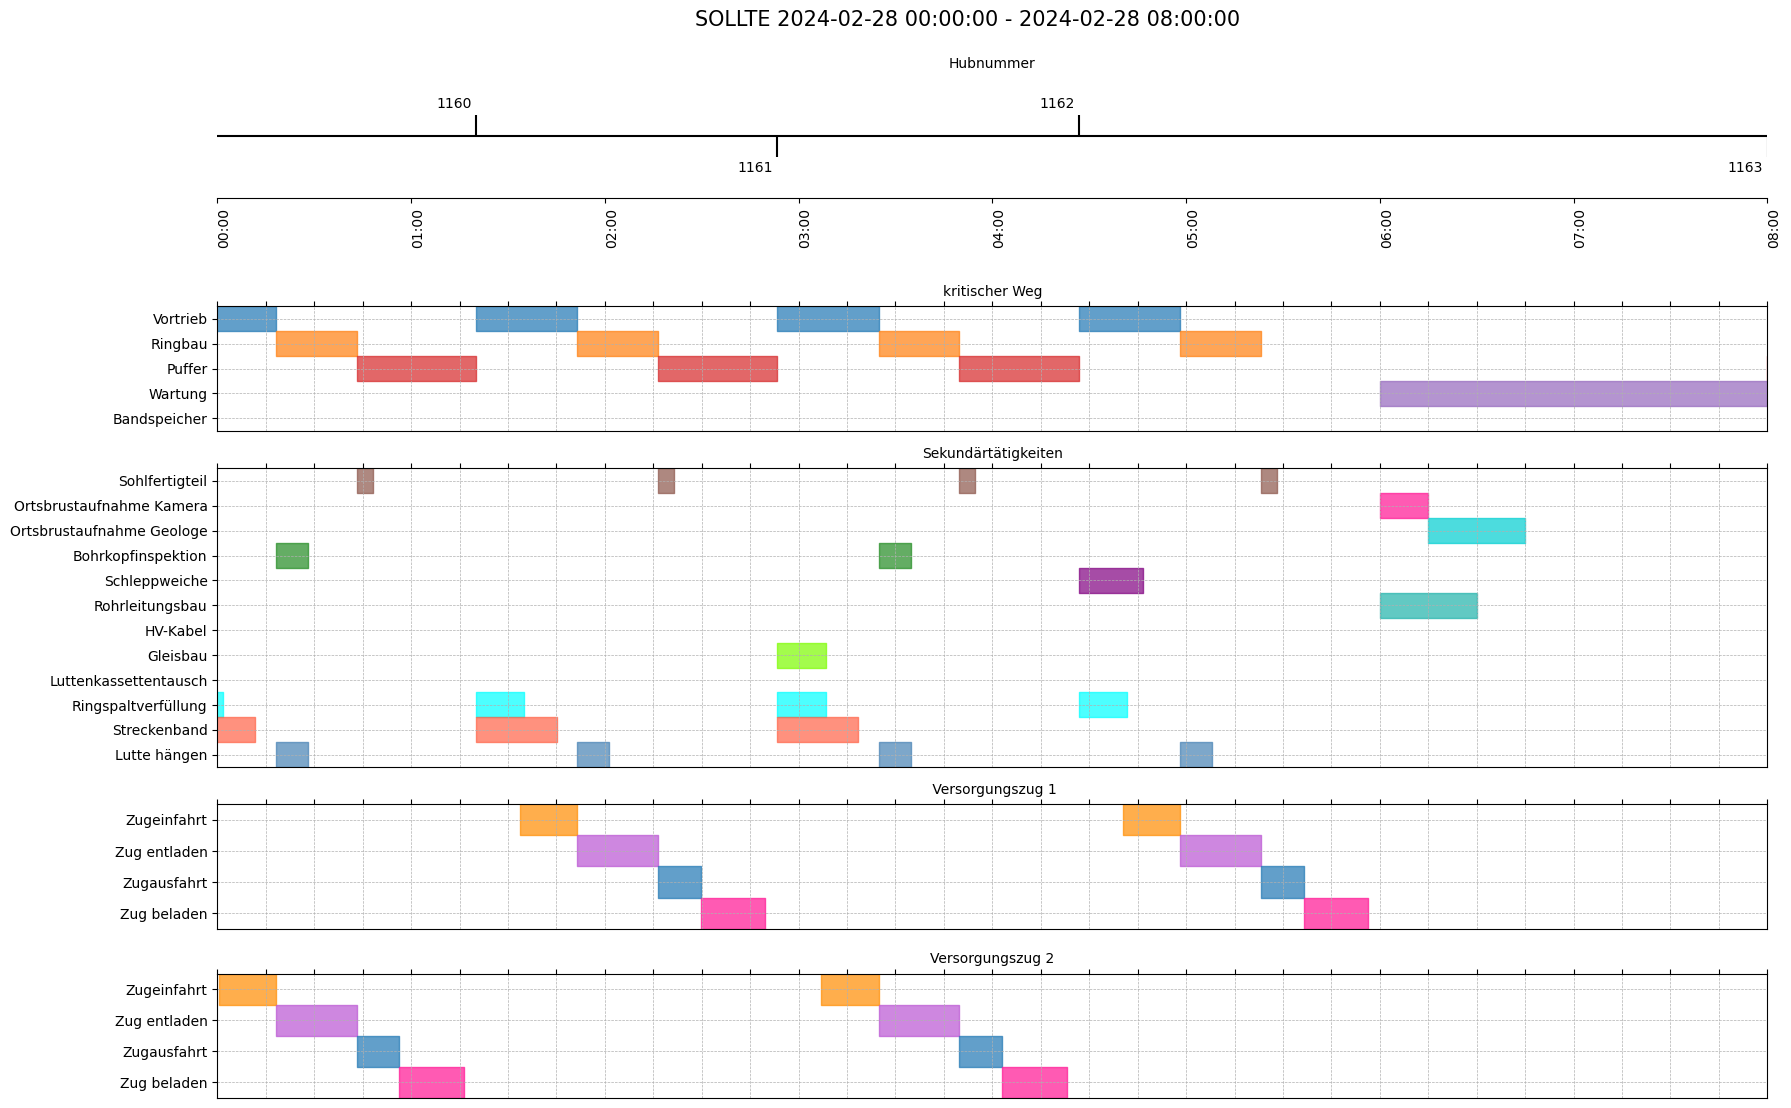

In [83]:
# Farben für die Balken
farben_k = ['#1f77b4', '#ff7f0e', '#d62728', '#9467bd', '#228b22']
farben_s = ['#8c564b', '#ff1493', '#00ced1', '#228b22', '#800080', '#20b2aa', '#dc143c',
            '#7cfc00', '#ffff00', '#00ffff', '#ff6347', '#4682b4']
farben_z = ['#ff8c00', '#ba55d3', '#1f77b4', '#ff1493']

intervall = 15
alle_15_min = betrachtungsSOLLTE_df['Zeitpunkt'][::intervall]

# Definiton des Höhenverhältnis
height_ratios = [5, 5, 12, 5, 5]

# Erstellt Abbildung mit Subplots (Zeilen, Spalte)
fig, axs = plt.subplots(5, 1, figsize=(20, 12), sharex=False, gridspec_kw={'height_ratios': height_ratios})

fig.text(0.5, 0.92, f"SOLLTE {start_bet_sollte} - {ende_bet_sollte}", ha='center', fontsize=15) # x-axis label


# Zeitstrahl Hubnummern/Stationierung (nicht gewünschtes auskommentieren)
betrachtung_df = betrachtungH_df
# betrachtung_df = betrachtungST_df

levels = np.tile([1, -1], int(np.ceil(len(betrachtung_df) / 2)))[:len(betrachtung_df)]

axs[0].vlines(betrachtung_df['Startzeitpunkt'], 0, levels, color="black")  # vertikale Striche
axs[0].plot(betrachtung_df['Startzeitpunkt'], np.zeros_like(betrachtung_df['Startzeitpunkt']), 
        color="black", markerfacecolor="w")

# Beschriftung der Linien
for d, l, r in zip(betrachtung_df['Startzeitpunkt'], levels, betrachtung_df['Hubnummer']):
    axs[0].annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top")

# X-Achse
axs[0].xaxis.tick_bottom()
axs[0].xaxis.set_label_position('bottom')

axs[0].xaxis.set_major_locator(mdates.HourLocator(interval=1))
axs[0].xaxis.set_major_formatter(mdates.DateFormatter("%H:%M")) #" %Y-%m-%d 
axs[0].set_xlim(start_bet_sollte, ende_bet_sollte)
plt.setp(axs[0].get_xticklabels(), rotation=90, ha="left")
axs[0].xaxis.set_label_position('top')
axs[0].set_xlabel('Hubnummer')
axs[0].xaxis.set_tick_params(bottom=True) 

# Y-Achse
axs[0].margins(y=1)
axs[0].yaxis.set_visible(False)
axs[0].spines[["left", "top", "right"]].set_visible(False)


# kritischer Weg
for idx, tätigkeit in enumerate(verschiedene_tätigkeiten_K):
    activity_data = betrachtetSOLLTEk_df[betrachtetSOLLTEk_df['Tätigkeit'] == tätigkeit]
    color = farben_k[idx % len(farben_k)]
    for i, row in activity_data.iterrows():
        axs[1].fill_betweenx([idx-0.5, idx+0.5], row['Startzeitpunkt'], row['Endzeitpunkt'], color=color, alpha=0.7)

# Y-Achse
axs[1].set_yticks(range(len(verschiedene_tätigkeiten_K)))
axs[1].set_yticklabels(verschiedene_tätigkeiten_K)
axs[1].set_ylim(-0.5, len(verschiedene_tätigkeiten_K) - 0.5)
axs[1].yaxis.grid(True, which='major', linestyle='--', linewidth=0.5)
axs[1].invert_yaxis()

# X-Achse
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
axs[1].xaxis.set_major_locator(mdates.HourLocator(interval=1))
axs[1].xaxis.set_minor_locator(mdates.MinuteLocator(interval=15))
axs[1].xaxis.grid(True, which='minor', linestyle='--', linewidth=0.5)
axs[1].xaxis.grid(True, which='major', linestyle='--', linewidth=0.5)
axs[1].set_xlim(start_bet_sollte, ende_bet_sollte)

axs[1].xaxis.set_label_position('top')
axs[1].set_xlabel('kritischer Weg')


axs[1].set_xticks(alle_15_min) # Teilstriche x-Achse
axs[1].set_xticklabels(alle_15_min, rotation=90)  
axs[1].xaxis.tick_top()
axs[1].tick_params(top=True, labeltop=False, bottom=False, labelbottom=False)


# Sekundärtätigkeiten
for idx, tätigkeit in enumerate(verschiedene_tätigkeiten_S):
    activity_data = betrachtetSOLLTEs_df[betrachtetSOLLTEs_df['Tätigkeit'] == tätigkeit]
    color = farben_s[idx % len(farben_s)]
    for i, row in activity_data.iterrows():
        axs[2].fill_betweenx([idx-0.5, idx+0.5], row['Startzeitpunkt'], row['Endzeitpunkt'], color=color, alpha=0.7)

# Y-Achse
axs[2].set_yticks(range(len(verschiedene_tätigkeiten_S)))
axs[2].set_yticklabels(verschiedene_tätigkeiten_S)
axs[2].set_ylim(-0.5, len(verschiedene_tätigkeiten_S) - 0.5)
axs[2].yaxis.grid(True, which='major', linestyle='--', linewidth=0.5)
axs[2].invert_yaxis()

# X-Achse
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
axs[2].xaxis.set_major_locator(mdates.HourLocator(interval=1))
axs[2].xaxis.set_minor_locator(mdates.MinuteLocator(interval=15))
axs[2].xaxis.grid(True, which='minor', linestyle='--', linewidth=0.5)
axs[2].xaxis.grid(True, which='major', linestyle='--', linewidth=0.5)
axs[2].set_xlim(start_bet_sollte, ende_bet_sollte)

axs[2].xaxis.set_label_position('top')
axs[2].set_xlabel('Sekundärtätigkeiten')

axs[2].set_xticks(alle_15_min) # Teilstriche x-Achse
axs[2].set_xticklabels(alle_15_min, rotation=90)  
axs[2].xaxis.tick_top()
axs[2].tick_params(top=True, labeltop=False, bottom=False, labelbottom=False)


# Versorgungszug 1
for idx, tätigkeit in enumerate(verschiedene_tätigkeiten_Z1):
    activity_data = betrachtetSOLLTEz1_df[betrachtetSOLLTEz1_df['Tätigkeit'] == tätigkeit]
    color = farben_z[idx % len(farben_z)]
    for i, row in activity_data.iterrows():
        axs[3].fill_betweenx([idx-0.5, idx+0.5], row['Startzeitpunkt'], row['Endzeitpunkt'], color=color, alpha=0.7)

# Y-Achse
axs[3].set_yticks(range(len(verschiedene_tätigkeiten_Z1)))
axs[3].set_yticklabels(verschiedene_tätigkeiten_Z1)
axs[3].set_ylim(-0.5, len(verschiedene_tätigkeiten_Z1) - 0.5)
axs[3].yaxis.grid(True, which='major', linestyle='--', linewidth=0.5)
axs[3].invert_yaxis()

# X-Achse
axs[3].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
axs[3].xaxis.set_major_locator(mdates.HourLocator(interval=1))
axs[3].xaxis.set_minor_locator(mdates.MinuteLocator(interval=15))
axs[3].xaxis.grid(True, which='minor', linestyle='--', linewidth=0.5)
axs[3].xaxis.grid(True, which='major', linestyle='--', linewidth=0.5)
axs[3].set_xlim(start_bet_sollte, ende_bet_sollte)

axs[3].xaxis.set_label_position('top')
axs[3].set_xlabel(' Versorgungszug 1')

axs[3].set_xticks(alle_15_min) # Teilstriche x-Achse
axs[3].set_xticklabels(alle_15_min, rotation=90)  
axs[3].xaxis.tick_top()
axs[3].tick_params(top=True, labeltop=False, bottom=False, labelbottom=False)

# Versorgungszug 2
for idx, tätigkeit in enumerate(verschiedene_tätigkeiten_Z2):
    activity_data = betrachtetSOLLTEz2_df[betrachtetSOLLTEz2_df['Tätigkeit'] == tätigkeit]
    color = farben_z[idx % len(farben_z)]
    for i, row in activity_data.iterrows():
        axs[4].fill_betweenx([idx-0.5, idx+0.5], row['Startzeitpunkt'], row['Endzeitpunkt'], color=color, alpha=0.7)

# Y-Achse
axs[4].set_yticks(range(len(verschiedene_tätigkeiten_Z2)))
axs[4].set_yticklabels(verschiedene_tätigkeiten_Z2)
axs[4].set_ylim(-0.5, len(verschiedene_tätigkeiten_Z2) - 0.5)
axs[4].yaxis.grid(True, which='major', linestyle='--', linewidth=0.5)
axs[4].invert_yaxis()

# X-Achse
axs[4].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
axs[4].xaxis.set_major_locator(mdates.HourLocator(interval=1))
axs[4].xaxis.set_minor_locator(mdates.MinuteLocator(interval=15))
axs[4].xaxis.grid(True, which='minor', linestyle='--', linewidth=0.5)
axs[4].xaxis.grid(True, which='major', linestyle='--', linewidth=0.5)
axs[4].set_xlim(start_bet_sollte, ende_bet_sollte)

axs[4].xaxis.set_label_position('top')
axs[4].set_xlabel('Versorgungszug 2')

axs[4].set_xticks(alle_15_min) # Teilstriche x-Achse
axs[4].set_xticklabels(alle_15_min, rotation=90)  
axs[4].xaxis.tick_top()

axs[4].tick_params(top=True, labeltop=False, bottom=False, labelbottom=False)


# Positionierung
pos0 = axs[0].get_position()
pos1 = axs[1].get_position()
pos2 = axs[2].get_position()
pos3 = axs[3].get_position()
pos4 = axs[4].get_position()

axs[1].set_position([pos1.x0, pos0.y0 - pos0.height - 0.09, pos0.width, pos1.height])
axs[2].set_position([pos2.x0, pos1.y0 - pos1.height - 0.24, pos1.width, pos2.height])
axs[3].set_position([pos3.x0, pos2.y0 - pos2.height + 0.046, pos2.width, pos3.height])
axs[4].set_position([pos4.x0, pos3.y0 - pos3.height - 0.11, pos3.width, pos4.height])


# Speichern des Schichtdiagramms
pfad = r'C:\Users\c8461417\Desktop\2024_02\00_neu\02_Skripte\03_SOLLTE'
dateiname = f"{start_bet_sollte.date()}.svg"
# Überprüft ob Pfad vorhanden
os.makedirs(pfad, exist_ok=True)
speicher_pfad = os.path.join(pfad, dateiname)
plt.savefig(speicher_pfad) #, bbox_inches='tight'

## visualisierte Wochenvorschau

filter DataFrame auf folgende Woche

In [84]:
betrachtetSOLLTEk_df = zeitplanSOLLTEk_df[(zeitplanSOLLTEk_df['Startzeitpunkt'] > start_bet_vor)
                                                   & (zeitplanSOLLTEk_df['Startzeitpunkt'] < ende_bet_vor) ]
betrachtetSOLLTEs_df = zeitplanSOLLTEs_df[(zeitplanSOLLTEs_df['Startzeitpunkt'] > start_bet_vor)
                                                   & (zeitplanSOLLTEs_df['Startzeitpunkt'] < ende_bet_vor) ]

In [85]:
betrachtetSOLLTEk_df['Endzeitpunkt_Datum'] = pd.to_datetime(betrachtetSOLLTEk_df['Endzeitpunkt_Datum'])

betrachtetSOLLTEs_df['Endzeitpunkt_Datum'] = betrachtetSOLLTEs_df['Endzeitpunkt'].dt.date
betrachtetSOLLTEs_df['Endzeitpunkt_Datum'] = pd.to_datetime(betrachtetSOLLTEs_df['Endzeitpunkt_Datum'])

C:\Users\c8461417\AppData\Local\Temp\ipykernel_7256\2908688379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  betrachtetSOLLTEk_df['Endzeitpunkt_Datum'] = pd.to_datetime(betrachtetSOLLTEk_df['Endzeitpunkt_Datum'])
C:\Users\c8461417\AppData\Local\Temp\ipykernel_7256\2908688379.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  betrachtetSOLLTEs_df['Endzeitpunkt_Datum'] = betrachtetSOLLTEs_df['Endzeitpunkt'].dt.date
C:\Users\c8461417\AppData\Local\Temp\ipykernel_7256\2908688379.py:4: SettingWithCopyWarn

neuer DataFrame

In [86]:
date_range = pd.date_range(start=start_bet_vor, end=(ende_bet_vor - timedelta(days=1)), freq='D')

In [87]:
wochenvorschauSOLLTEk_df = pd.DataFrame()
wochenvorschauSOLLTEk_df['Tage'] = date_range

wochenvorschauSOLLTEs_df = pd.DataFrame()
wochenvorschauSOLLTEs_df['Tage'] = date_range

In [88]:
anzahl_tätigkeiten_K = zeitplanSOLLk_df['Tätigkeit'].nunique()
verschiedene_tätigkeiten_K = ['Vortrieb', 'Ringbau', 'Puffer', 'Wartung', 'Bandspeicher']

anzahl_tätigkeiten_S = zeitplanSOLLs_df['Tätigkeit'].nunique()
verschiedene_tätigkeiten_S = ['Sohlfertigteil', 'Ortsbrustaufnahme Kamera', 'Ortsbrustaufnahme Geologe', 'Bohrkopfinspektion',
                              'Schleppweiche', 'Rohrleitungsbau', 'HV-Kabel', 'Gleisbau', 'Luttenkassettentausch',
                              'Ringspaltverfüllung', 'Streckenband', 'Lutte hängen' ]

erstellen und befüllen der Spalten

In [89]:
for column in verschiedene_tätigkeiten_K:
    wochenvorschauSOLLTEk_df[column] = 0

In [90]:
for column in verschiedene_tätigkeiten_S:
    wochenvorschauSOLLTEs_df[column] = 0

überprüft, welche Tätigkeit an welchem Tag vorkommt

In [91]:
for index, row in wochenvorschauSOLLTEk_df.iterrows():
    tage = row['Tage']
    
    matching_rows = betrachtetSOLLTEk_df[betrachtetSOLLTEk_df['Endzeitpunkt_Datum'] == tage]
    
    for tätigkeit in verschiedene_tätigkeiten_K:
        if not matching_rows.empty and (matching_rows['Tätigkeit'] == tätigkeit).any():
            wochenvorschauSOLLTEk_df.at[index, tätigkeit] = 1

In [92]:
for index, row in wochenvorschauSOLLTEs_df.iterrows():
    tage = row['Tage']
    
    matching_rows = betrachtetSOLLTEs_df[betrachtetSOLLTEs_df['Endzeitpunkt_Datum'] == tage]
    
    for tätigkeit in verschiedene_tätigkeiten_S:
        if not matching_rows.empty and (matching_rows['Tätigkeit'] == tätigkeit).any():
            wochenvorschauSOLLTEs_df.at[index, tätigkeit] = 1

entpivotieren

In [93]:
# neuer DataFrame
zeitplan_vor_SOLLTEk_df = pd.DataFrame()

# enpivotieren
zeitplan_vor_SOLLTEk_df = pd.melt(wochenvorschauSOLLTEk_df, id_vars=['Tage'], 
                value_vars=verschiedene_tätigkeiten_K, var_name='Tätigkeit')

# filtern nach vorkommenden Tätigkeiten und neue Indizes
zeitplan_vor_SOLLTEk_df = zeitplan_vor_SOLLTEk_df[zeitplan_vor_SOLLTEk_df['value'] == 1]
zeitplan_vor_SOLLTEk_df.reset_index(drop=True, inplace=True)


# Reihenfolge
zeitplan_vor_SOLLTEk_df = zeitplan_vor_SOLLTEk_df.sort_values(by='Tage')
zeitplan_vor_SOLLTEk_df.reset_index(drop=True, inplace=True)


zeitplan_vor_SOLLTEk_df['Start'] = pd.to_datetime(zeitplan_vor_SOLLTEk_df['Tage'])
zeitplan_vor_SOLLTEk_df['Ende'] = pd.to_datetime(zeitplan_vor_SOLLTEk_df['Start']) + timedelta(hours=24) - timedelta(seconds=1)

zeitplan_vor_SOLLTEk_df = zeitplan_vor_SOLLTEk_df.drop(columns=['value'])

In [94]:
# neuer DataFrame
zeitplan_vor_SOLLTEs_df = pd.DataFrame()

# enpivotieren
zeitplan_vor_SOLLTEs_df = pd.melt(wochenvorschauSOLLTEs_df, id_vars=['Tage'], 
                value_vars=verschiedene_tätigkeiten_S, var_name='Tätigkeit')

# filtern nach vorkommenden Tätigkeiten und neue Indizes
zeitplan_vor_SOLLTEs_df = zeitplan_vor_SOLLTEs_df[zeitplan_vor_SOLLTEs_df['value'] == 1]
zeitplan_vor_SOLLTEs_df.reset_index(drop=True, inplace=True)


# Reihenfolge
zeitplan_vor_SOLLTEs_df = zeitplan_vor_SOLLTEs_df.sort_values(by='Tage')
zeitplan_vor_SOLLTEs_df.reset_index(drop=True, inplace=True)


zeitplan_vor_SOLLTEs_df['Start'] = pd.to_datetime(zeitplan_vor_SOLLTEs_df['Tage'])
zeitplan_vor_SOLLTEs_df['Ende'] = pd.to_datetime(zeitplan_vor_SOLLTEs_df['Start']) + timedelta(hours=24) - timedelta(seconds=1)

zeitplan_vor_SOLLTEs_df = zeitplan_vor_SOLLTEs_df.drop(columns=['value'])

visualisierte Monatvorschau

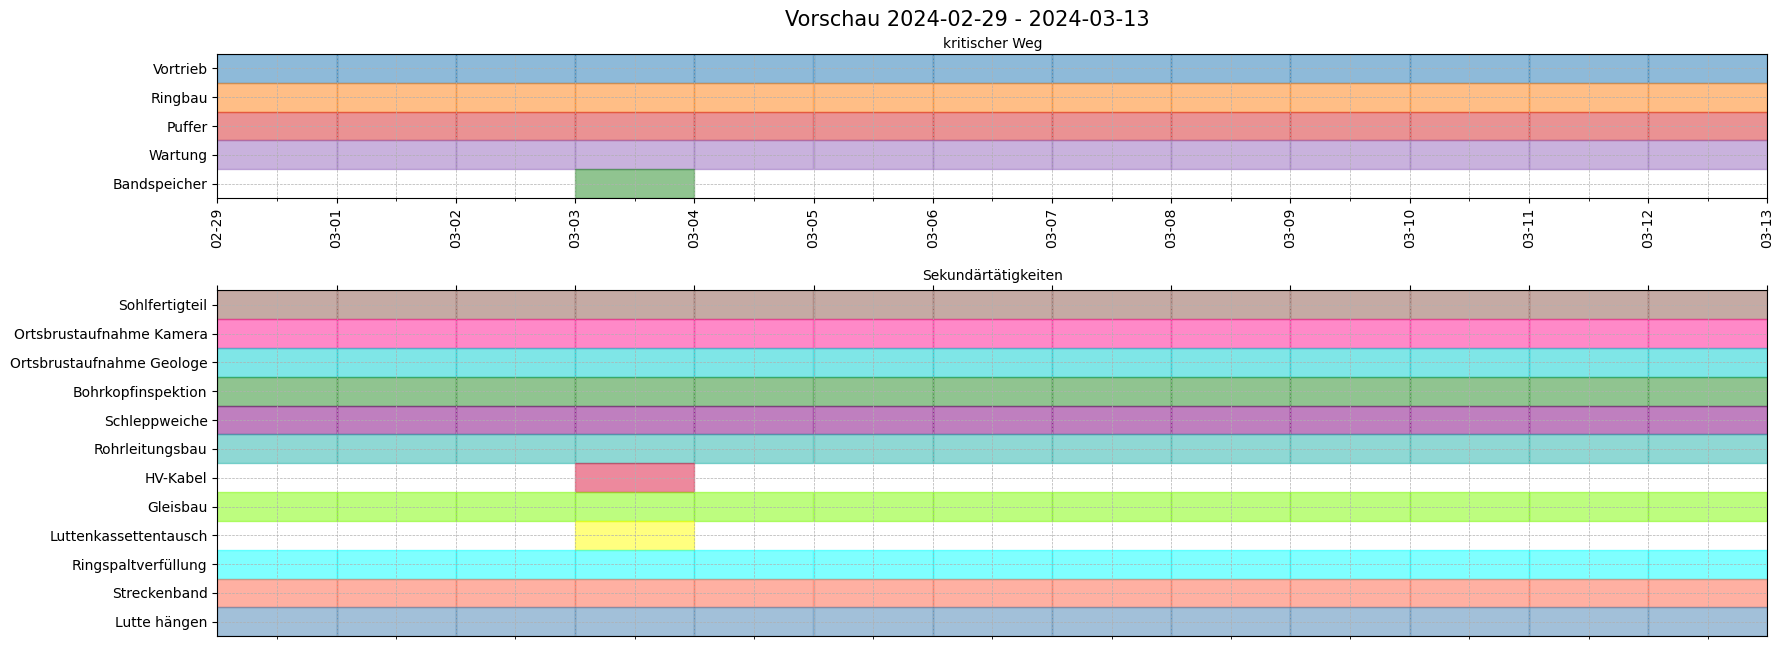

In [95]:
farben_k = ['#1f77b4', '#ff7f0e', '#d62728', '#9467bd', '#228b22']
farben_s = ['#8c564b', '#ff1493', '#00ced1', '#228b22', '#800080', '#20b2aa', '#dc143c',
            '#7cfc00', '#ffff00', '#00ffff', '#ff6347', '#4682b4']

# Definiton des Höhenverhältnis
height_ratios = [5, 12]

# Erstellt Abbildung mit Subplots (Zeilen, Spalte)
fig, axs = plt.subplots(2, 1, figsize=(20, 7), sharex=False, gridspec_kw={'height_ratios': height_ratios})

fig.text(0.5, 0.92, f"Vorschau {start_bet_vor.date()} - {ende_bet_vor.date()}", ha='center', fontsize=15) # x-axis label


# kritischer Weg
for idx, tätigkeit in enumerate(verschiedene_tätigkeiten_K):
    activity_data = zeitplan_vor_SOLLTEk_df[zeitplan_vor_SOLLTEk_df['Tätigkeit'] == tätigkeit]
    color = farben_k[idx % len(farben_k)]
    for i, row in activity_data.iterrows():
        axs[0].fill_betweenx([idx-0.5, idx+0.5], row['Start'], row['Ende'], color=color, alpha=0.5)

# Y-Achse
axs[0].set_yticks(range(len(verschiedene_tätigkeiten_K)))
axs[0].set_yticklabels(verschiedene_tätigkeiten_K)
axs[0].set_ylim(-0.5, len(verschiedene_tätigkeiten_K) - 0.5)
axs[0].yaxis.grid(True, which='major', linestyle='--', linewidth=0.5)
axs[0].invert_yaxis()

# X-Achse
axs[0].xaxis.set_major_locator(mdates.DayLocator())
axs[0].xaxis.set_minor_locator(mdates.HourLocator(interval=12))
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
axs[0].xaxis.grid(True, which='minor', linestyle='--', linewidth=0.5)
axs[0].xaxis.grid(True, which='major', linestyle='--', linewidth=0.5)
axs[0].set_xlim(start_bet_vor, ende_bet_vor)

axs[0].xaxis.set_label_position('top')
axs[0].set_xlabel('kritischer Weg')

for label in axs[0].get_xticklabels():
    label.set_rotation(90)


axs[0].tick_params(top=False, labeltop=False, bottom=True, labelbottom=True)


# Sekundärtätigkeiten
for idx, tätigkeit in enumerate(verschiedene_tätigkeiten_S):
    activity_data = zeitplan_vor_SOLLTEs_df[zeitplan_vor_SOLLTEs_df['Tätigkeit'] == tätigkeit]
    color = farben_s[idx % len(farben_s)]
    for i, row in activity_data.iterrows():
        axs[1].fill_betweenx([idx-0.5, idx+0.5], row['Start'], row['Ende'], color=color, alpha=0.5)

# Y-Achse
axs[1].set_yticks(range(len(verschiedene_tätigkeiten_S)))
axs[1].set_yticklabels(verschiedene_tätigkeiten_S)
axs[1].set_ylim(-0.5, len(verschiedene_tätigkeiten_S) - 0.5)
axs[1].yaxis.grid(True, which='major', linestyle='--', linewidth=0.5)
axs[1].invert_yaxis()

# X-Achse
axs[1].xaxis.set_major_locator(mdates.DayLocator())
axs[1].xaxis.set_minor_locator(mdates.HourLocator(interval=12))
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
axs[1].xaxis.grid(True, which='minor', linestyle='--', linewidth=0.5)
axs[1].xaxis.grid(True, which='major', linestyle='--', linewidth=0.5)
axs[1].set_xlim(start_bet_vor, ende_bet_vor)

axs[1].xaxis.set_label_position('top')
axs[1].set_xlabel('Sekundärtätigkeiten')

for label in axs[1].get_xticklabels():
    label.set_rotation(90)

axs[1].tick_params(top=True, labeltop=False, bottom=False, labelbottom=False)


# Positionierung
pos0 = axs[0].get_position()
pos1 = axs[1].get_position()

axs[1].set_position([pos0.x0, pos0.y0 - pos0.height - 0.42, pos0.width, pos1.height])


# Speichern des Schichtdiagramms
pfad = r'C:\Users\c8461417\Desktop\2024_02\00_neu\02_Skripte\03_SOLLTE'
dateiname = f"längere Vorschau {start_bet_sollte.date()}.svg"
# Überprüft ob Pfad vorhanden
os.makedirs(pfad, exist_ok=True)
speicher_pfad = os.path.join(pfad, dateiname)
plt.savefig(speicher_pfad) #, bbox_inches='tight'